# PARCIAL FINAL

Presentado por: Angie Vanesa Guerrero Bertel

Profesor: Lihki Rubio

Fecha: 08/10/2023

- LIBRERÍAS

In [190]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import kurtosis
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GroupKFold
from sklearn.svm import SVR
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np
#Importe la librería ScikitLearn específicamente el algoritmo de LOF
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_moons
import xgboost as xgb
import random


- Importamos la base de datos sobre detención de fraude

In [2]:
archivo_csv = "train_transaction.csv"
df = pd.read_csv(archivo_csv)
print('All data shape: ', df.shape)
df.head()

All data shape:  (590540, 394)


TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ... V330  V331  V332  V333  V334 V335  \
0    NaN  150.0    discover  142.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
1  404.0  150.0  mastercard  102.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
2  490.0  150.0        visa  166.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
3  567.0  150.0  mastercard  117.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
4  514.0  150.0  mastercard  102.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   

  V336  V337  V338  V339  
0  NaN   NaN   NaN   NaN  
1  NaN   NaN   NaN   NaN  
2  NaN   NaN   NaN   NaN  
3  NaN   NaN   NaN   NaN  
4  0.0   0.0   0.0   0.0  

[5 rows x 394 columns]

# DETECCIÓN DE FRAUDES

## Análisis exploratorio de la base de datos:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


- Número de observaciones en la base de datos: 

In [4]:
print('Número de observaciones: ', df.shape[0])

Número de observaciones:  590540


- Se tienen 394 atributos, de los cuales 380 son numéricos y 14 son categóricos.

In [5]:
df.describe()

TransactionID        isFraud  TransactionDT  TransactionAmt  \
count   5.905400e+05  590540.000000   5.905400e+05   590540.000000   
mean    3.282270e+06       0.034990   7.372311e+06      135.027176   
std     1.704744e+05       0.183755   4.617224e+06      239.162522   
min     2.987000e+06       0.000000   8.640000e+04        0.251000   
25%     3.134635e+06       0.000000   3.027058e+06       43.321000   
50%     3.282270e+06       0.000000   7.306528e+06       68.769000   
75%     3.429904e+06       0.000000   1.124662e+07      125.000000   
max     3.577539e+06       1.000000   1.581113e+07    31937.391000   

               card1          card2          card3          card5  \
count  590540.000000  581607.000000  588975.000000  586281.000000   
mean     9898.734658     362.555488     153.194925     199.278897   
std      4901.170153     157.793246      11.336444      41.244453   
min      1000.000000     100.000000     100.000000     100.000000   
25%      6019.000000     214.000000     150.000000     166.000000   
50%      9678.000000     361.000000     150.000000     226.000000   
75%     14184.000000     512.000000     150.000000     226.000000   
max     18396.000000     600.000000     231.000000     237.000000   

               addr1          addr2  ...          V330           V331  \
count  524834.000000  524834.000000  ...  82351.000000   82351.000000   
mean      290.733794      86.800630  ...      0.775874     721.741883   
std       101.741072       2.690623  ...      4.727971    6217.223583   
min       100.000000      10.000000  ...      0.000000       0.000000   
25%       204.000000      87.000000  ...      0.000000       0.000000   
50%       299.000000      87.000000  ...      0.000000       0.000000   
75%       330.000000      87.000000  ...      0.000000       0.000000   
max       540.000000     102.000000  ...     55.000000  160000.000000   

                V332           V333          V334         V335          V336  \
count   82351.000000   82351.000000  82351.000000  82351.00000  82351.000000   
mean     1375.783644    1014.622782      9.807015     59.16455     28.530903   
std     11169.275702    7955.735482    243.861391    387.62948    274.576920   
min         0.000000       0.000000      0.000000      0.00000      0.000000   
25%         0.000000       0.000000      0.000000      0.00000      0.000000   
50%         0.000000       0.000000      0.000000      0.00000      0.000000   
75%        25.000000       0.000000      0.000000      0.00000      0.000000   
max    160000.000000  160000.000000  55125.000000  55125.00000  55125.000000   

                V337           V338           V339  
count   82351.000000   82351.000000   82351.000000  
mean       55.352422     151.160542     100.700882  
std       668.486833    1095.034387     814.946722  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000  
max    104060.000000  104060.000000  104060.000000  

[8 rows x 380 columns]

In [6]:
data_NA = df.isna().sum()
data_NA

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
V335              508189
V336              508189
V337              508189
V338              508189
V339              508189
Length: 394, dtype: int64

### selección de variables independientes

Se eligieron mínimo cuatro variables independientes

- Variable respuesta: isFraud---> categórica
- Variables independientes: TransactionAmt, ProductCD, card1, card4

In [7]:
nuevo_df = df.loc[:, ['isFraud','TransactionAmt', 'ProductCD', 'card1', 'card4']]

In [8]:
nuevo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   isFraud         590540 non-null  int64  
 1   TransactionAmt  590540 non-null  float64
 2   ProductCD       590540 non-null  object 
 3   card1           590540 non-null  int64  
 4   card4           588963 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 22.5+ MB


seleccionando como variables independientes "TransactionAmt" , "ProductCD ", "card1", "card4", tenemos una data de 590540 observaciones, la única variable independiente con valores faltantes es 'card4', la cual es categórica y tiene solo 588963 registros. 

- Estadística descriptiva: Media, desviasión estándar, mínimo, máximo, cuartiles

In [9]:
nuevo_df.describe().T

count         mean          std       min       25%  \
isFraud         590540.0     0.034990     0.183755     0.000     0.000   
TransactionAmt  590540.0   135.027176   239.162522     0.251    43.321   
card1           590540.0  9898.734658  4901.170153  1000.000  6019.000   

                     50%      75%        max  
isFraud            0.000      0.0      1.000  
TransactionAmt    68.769    125.0  31937.391  
card1           9678.000  14184.0  18396.000

Podemos ver que las variables transactionAmt, TransactionDT y card1 tienen diferentes escalas de medida. 

TransactionAmt --> tiene una media de 135,027 con una desviación estándar de 239.16.Vemos que el 50% de los datos tienen un registro igual o inferior a 68.769. 

card1--> tiene una media de 9898,73 con una desviación estándar de 4901,17. vemos que el valor mínimo es de 1000 y máximo de 18396. Un 50% de los datos tienen un registro en card1 por debajo de la media. 


### Datos faltantes:

- Conteo de datos faltantes:

In [10]:
all_data_NA = nuevo_df.isna().sum()
pd.concat([all_data_NA], axis=1, sort = False, keys = [ 'All NA'])

All NA
isFraud              0
TransactionAmt       0
ProductCD            0
card1                0
card4             1577

Vemos que la columna "card4" tiene 1577 datos faltantes.

- Porcentaje de datos faltantes:

In [11]:
porcentaje_faltantes_por_columna = ((all_data_NA / len(nuevo_df)) * 100)
porcentaje_faltantes_por_columna

isFraud           0.000000
TransactionAmt    0.000000
ProductCD         0.000000
card1             0.000000
card4             0.267044
dtype: float64

vemos que el 0,267 % de los datos tienen registros faltantes en la variable "card4"

### Histogramas y diagramas de barras:

- Variable respuesta: isFraud

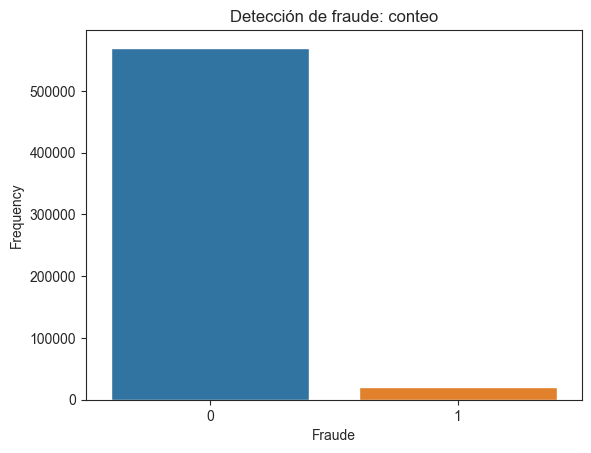

In [12]:
sns.set_style("ticks")
plt.title('Detección de fraude: conteo')
sns.countplot(x=nuevo_df.isFraud)
plt.xlabel('Fraude')
plt.ylabel('Frequency')
plt.show()

Vemos que la muestra está bastante desbalanceada; teniendo pocos registros de fraude.

- variables independientes categóricas: 'card4' y 'ProductCD'

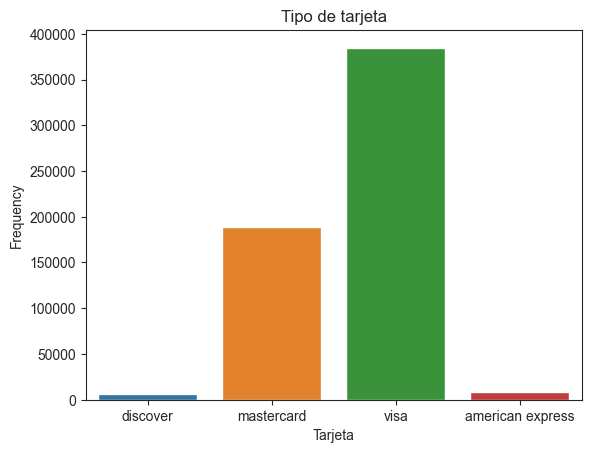

In [13]:
sns.set_style("ticks")
plt.title('Tipo de tarjeta')
sns.countplot(x=nuevo_df.card4)
plt.xlabel('Tarjeta')
plt.ylabel('Frequency')
plt.show()

El Diagrama de barras nos muestra que de los registros, la mayoría tiene tarjeta de crédito visa, seguida de mastercard. la tarjeta tipo discover es de la que se tiene menos registros. 

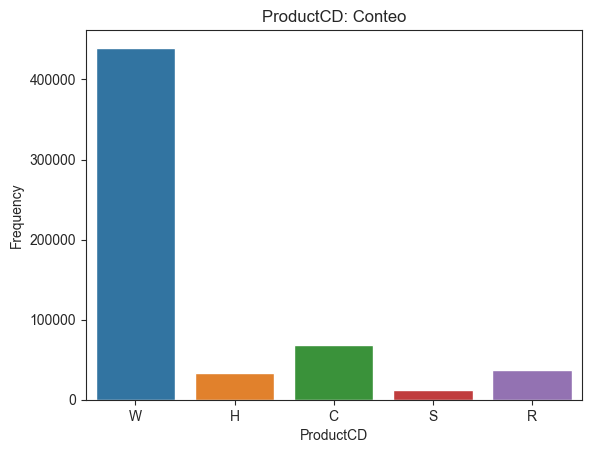

In [14]:
sns.set_style("ticks")
plt.title('ProductCD: Conteo')
sns.countplot(x=nuevo_df.ProductCD)
plt.xlabel('ProductCD')
plt.ylabel('Frequency')
plt.show()

con respecto a la variable 'ProductCD' , el mayor registro es 'W', seguido de 'C' y 'R'. Con menos registros está 'S'

- Histogramas:

Variables numéricas: 'TransactionAmt' y 'card1'

In [15]:
nuevo_df.head()

isFraud  TransactionAmt ProductCD  card1       card4
0        0            68.5         W  13926    discover
1        0            29.0         W   2755  mastercard
2        0            59.0         W   4663        visa
3        0            50.0         W  18132  mastercard
4        0            50.0         H   4497  mastercard

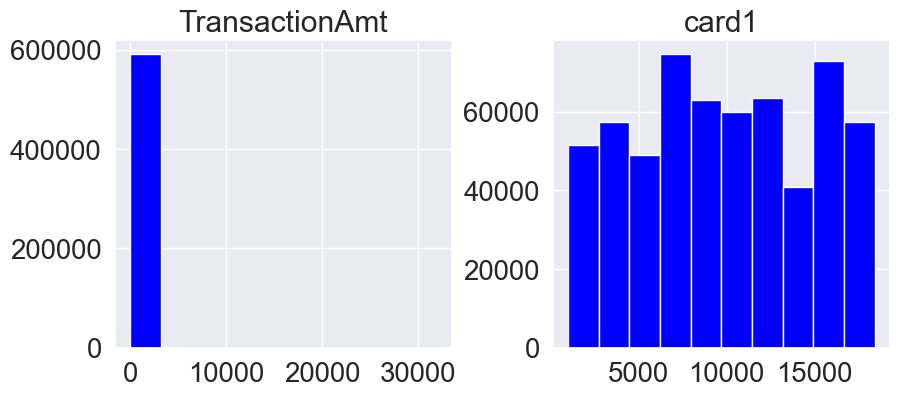

In [16]:
sns.set(font_scale=1.8)
nuevo_df.iloc[: , 1:].hist(figsize = (10,4), color = 'Blue');

Vemos que las variables TransactionAmt y card1 no siguen una distribución normal. 

- Análisis de simetría, datos atípicos y dispersión:


- Variables numéricas: 


Column:  TransactionAmt
Skew: 14.37
Kurtosis:  1123.96


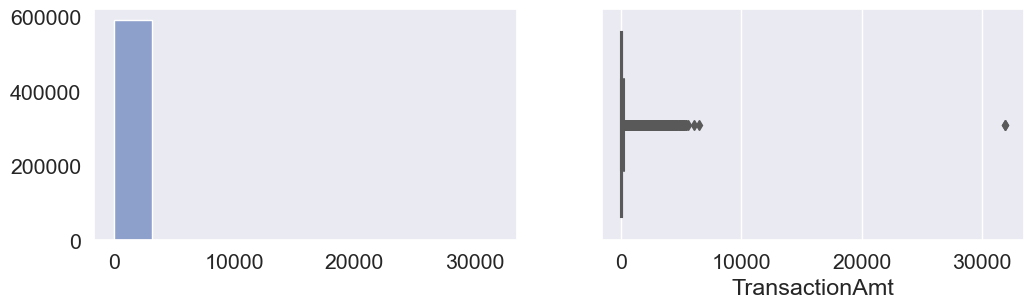

Column:  card1
Skew: -0.04
Kurtosis:  -1.14


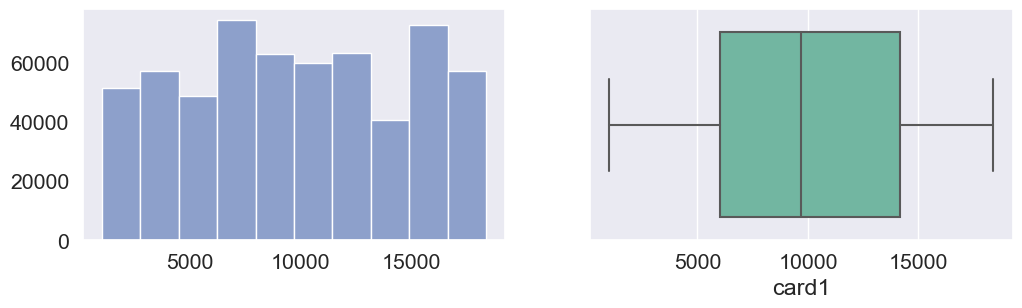

In [17]:
num_cols=['TransactionAmt', 'card1']
custom_palette = sns.color_palette("Set2")
sns.set(font_scale=1.4)
for col in num_cols:
    print('Column: ', col)
    print('Skew:', round(nuevo_df[col].skew(), 2))
    print('Kurtosis: ', round(nuevo_df[col].kurtosis(), 2))
    plt.figure(figsize = (12, 3))
    plt.subplot(1, 2, 1)
    nuevo_df[col].hist(grid=False, color=custom_palette[2]) #sin fondo cuadriculado y primer color de los colores personalizados
    plt.subplot(1, 2, 2)
    sns.boxplot(x=nuevo_df[col], palette='Set2')
    plt.show()

vemos que la variable card1 tiene un leve sesgo negativo (Mayor peso en la cola derecha de la distribución ), mientras que la variable 'TransactionAmt', tiene un sesgo positivo (Mayor peso en la cola izquierda de la distribución), hay una fuerte asimetría y evidentemente no hay normalidad en esta variable: también se visualizan posibles datos atípicos en el boxplot. 

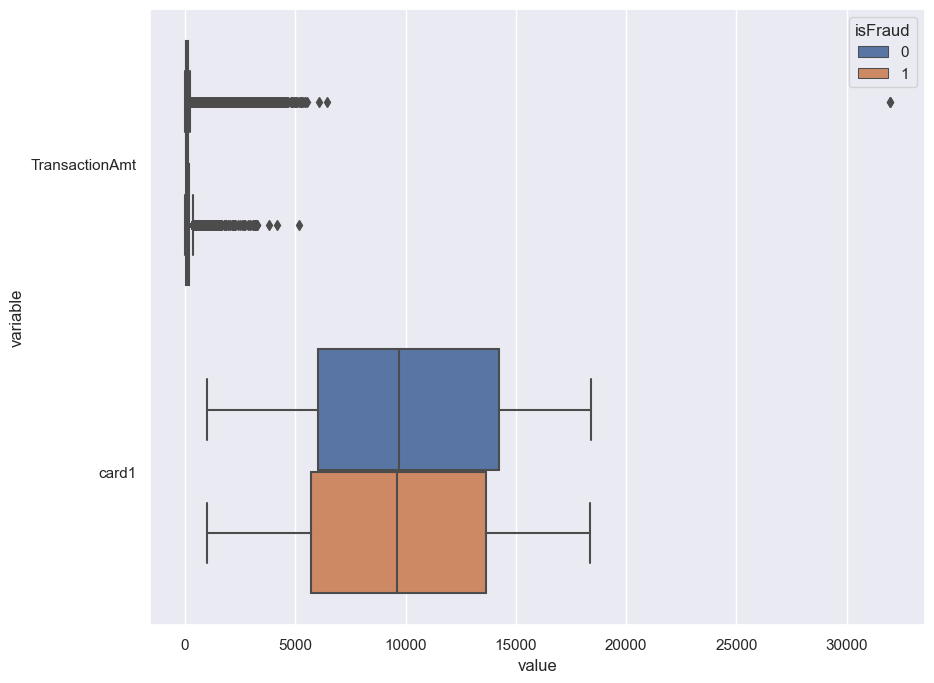

In [18]:
melted_data = pd.melt(nuevo_df, id_vars = "isFraud",value_vars = ['TransactionAmt', 'card1'])
sns.set(font_scale=1)
plt.figure(figsize = (10,8))
sns.boxplot(x = "value", y = "variable", hue="isFraud",data= melted_data);

### Análisis bivariado:


- Variables independientes: TransactionAmt card1

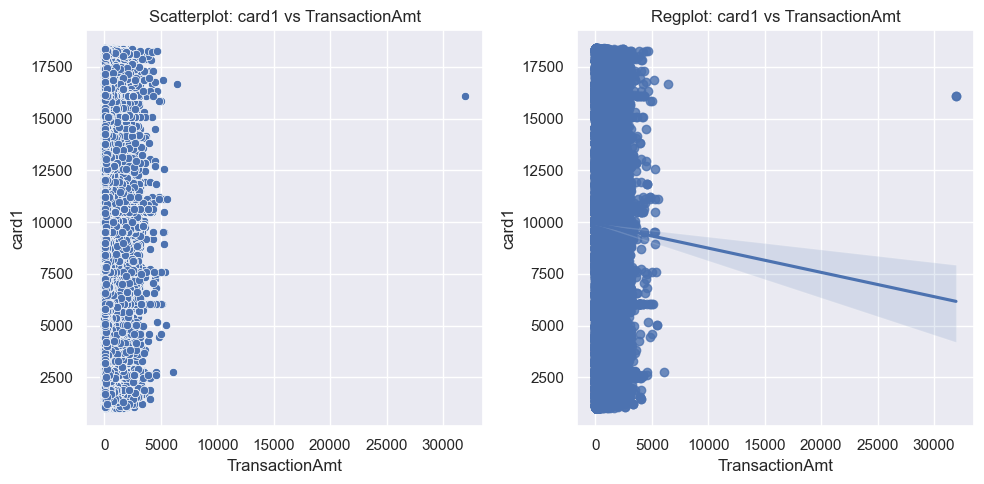

In [19]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=nuevo_df, x='TransactionAmt', y='card1')
plt.title('Scatterplot: card1 vs TransactionAmt')

plt.subplot(1, 2, 2)
sns.regplot(data=nuevo_df, x='TransactionAmt', y='card1')
plt.title('Regplot: card1 vs TransactionAmt')

plt.tight_layout()
plt.show()

El gráfico nos muestra que no hay visualmente una asociación lineal entre las variables transactionAmt y card1

- Variables independientes: 'TransactionDT','TransactionAmt'

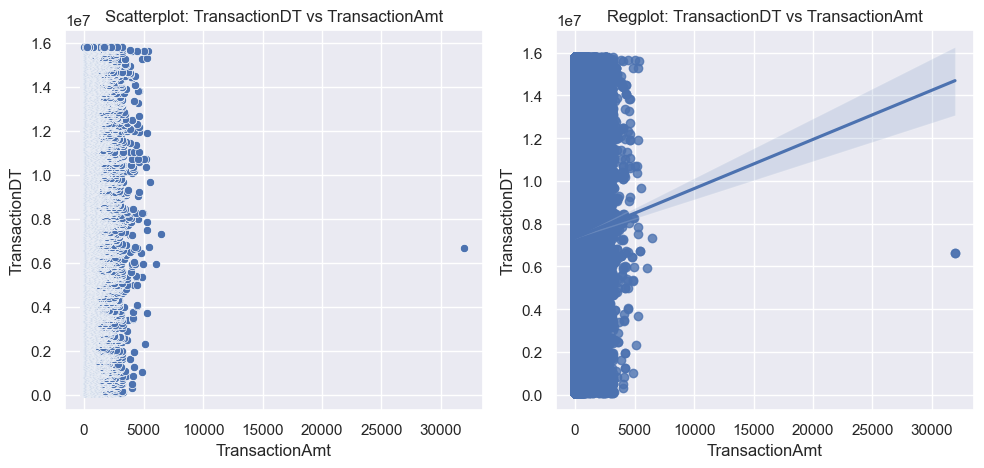

In [20]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='TransactionAmt', y='TransactionDT')
plt.title('Scatterplot: TransactionDT vs TransactionAmt')

plt.subplot(1, 2, 2)
sns.regplot(data=df, x='TransactionAmt', y='TransactionDT')
plt.title('Regplot: TransactionDT vs TransactionAmt')

plt.tight_layout()
plt.show()

Para las variables TransactionDT y TransactionAmt , no se ve una asociación lineal entre las dos variables. vemos que muchos datos se concentran en la izquierda, por lo que no es claro si a medida que aumentan transactionAmt aumentan transactionDT

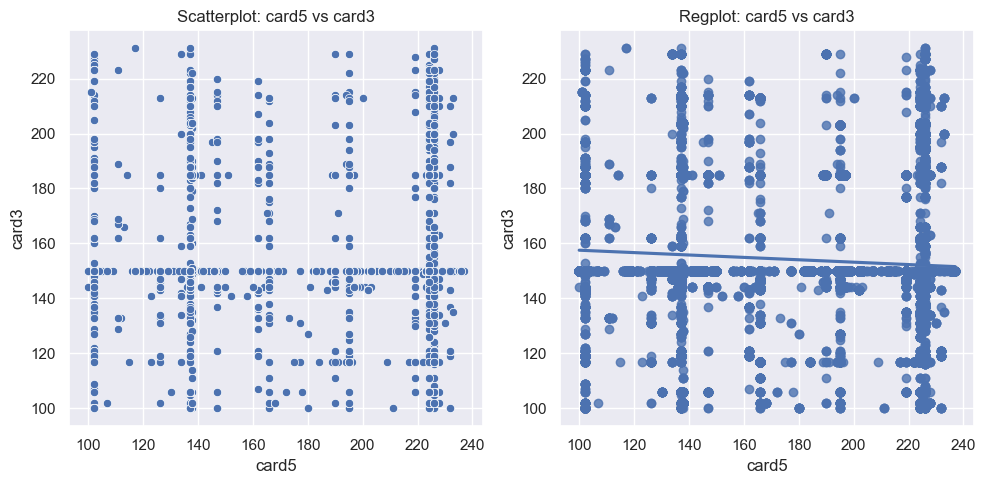

In [21]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='card5', y='card3')
plt.title('Scatterplot: card5 vs card3')

plt.subplot(1, 2, 2)
sns.regplot(data=df, x='card5', y='card3')
plt.title('Regplot: card5 vs card3')

plt.tight_layout()
plt.show()

Para las variables card5 y card3 se ve mucha dispersión de los datos. no es clara la tendencia, probablemente a medida que aumentan card5 , card3 disminuye. 


- variables explicativas: card2 y addr1:

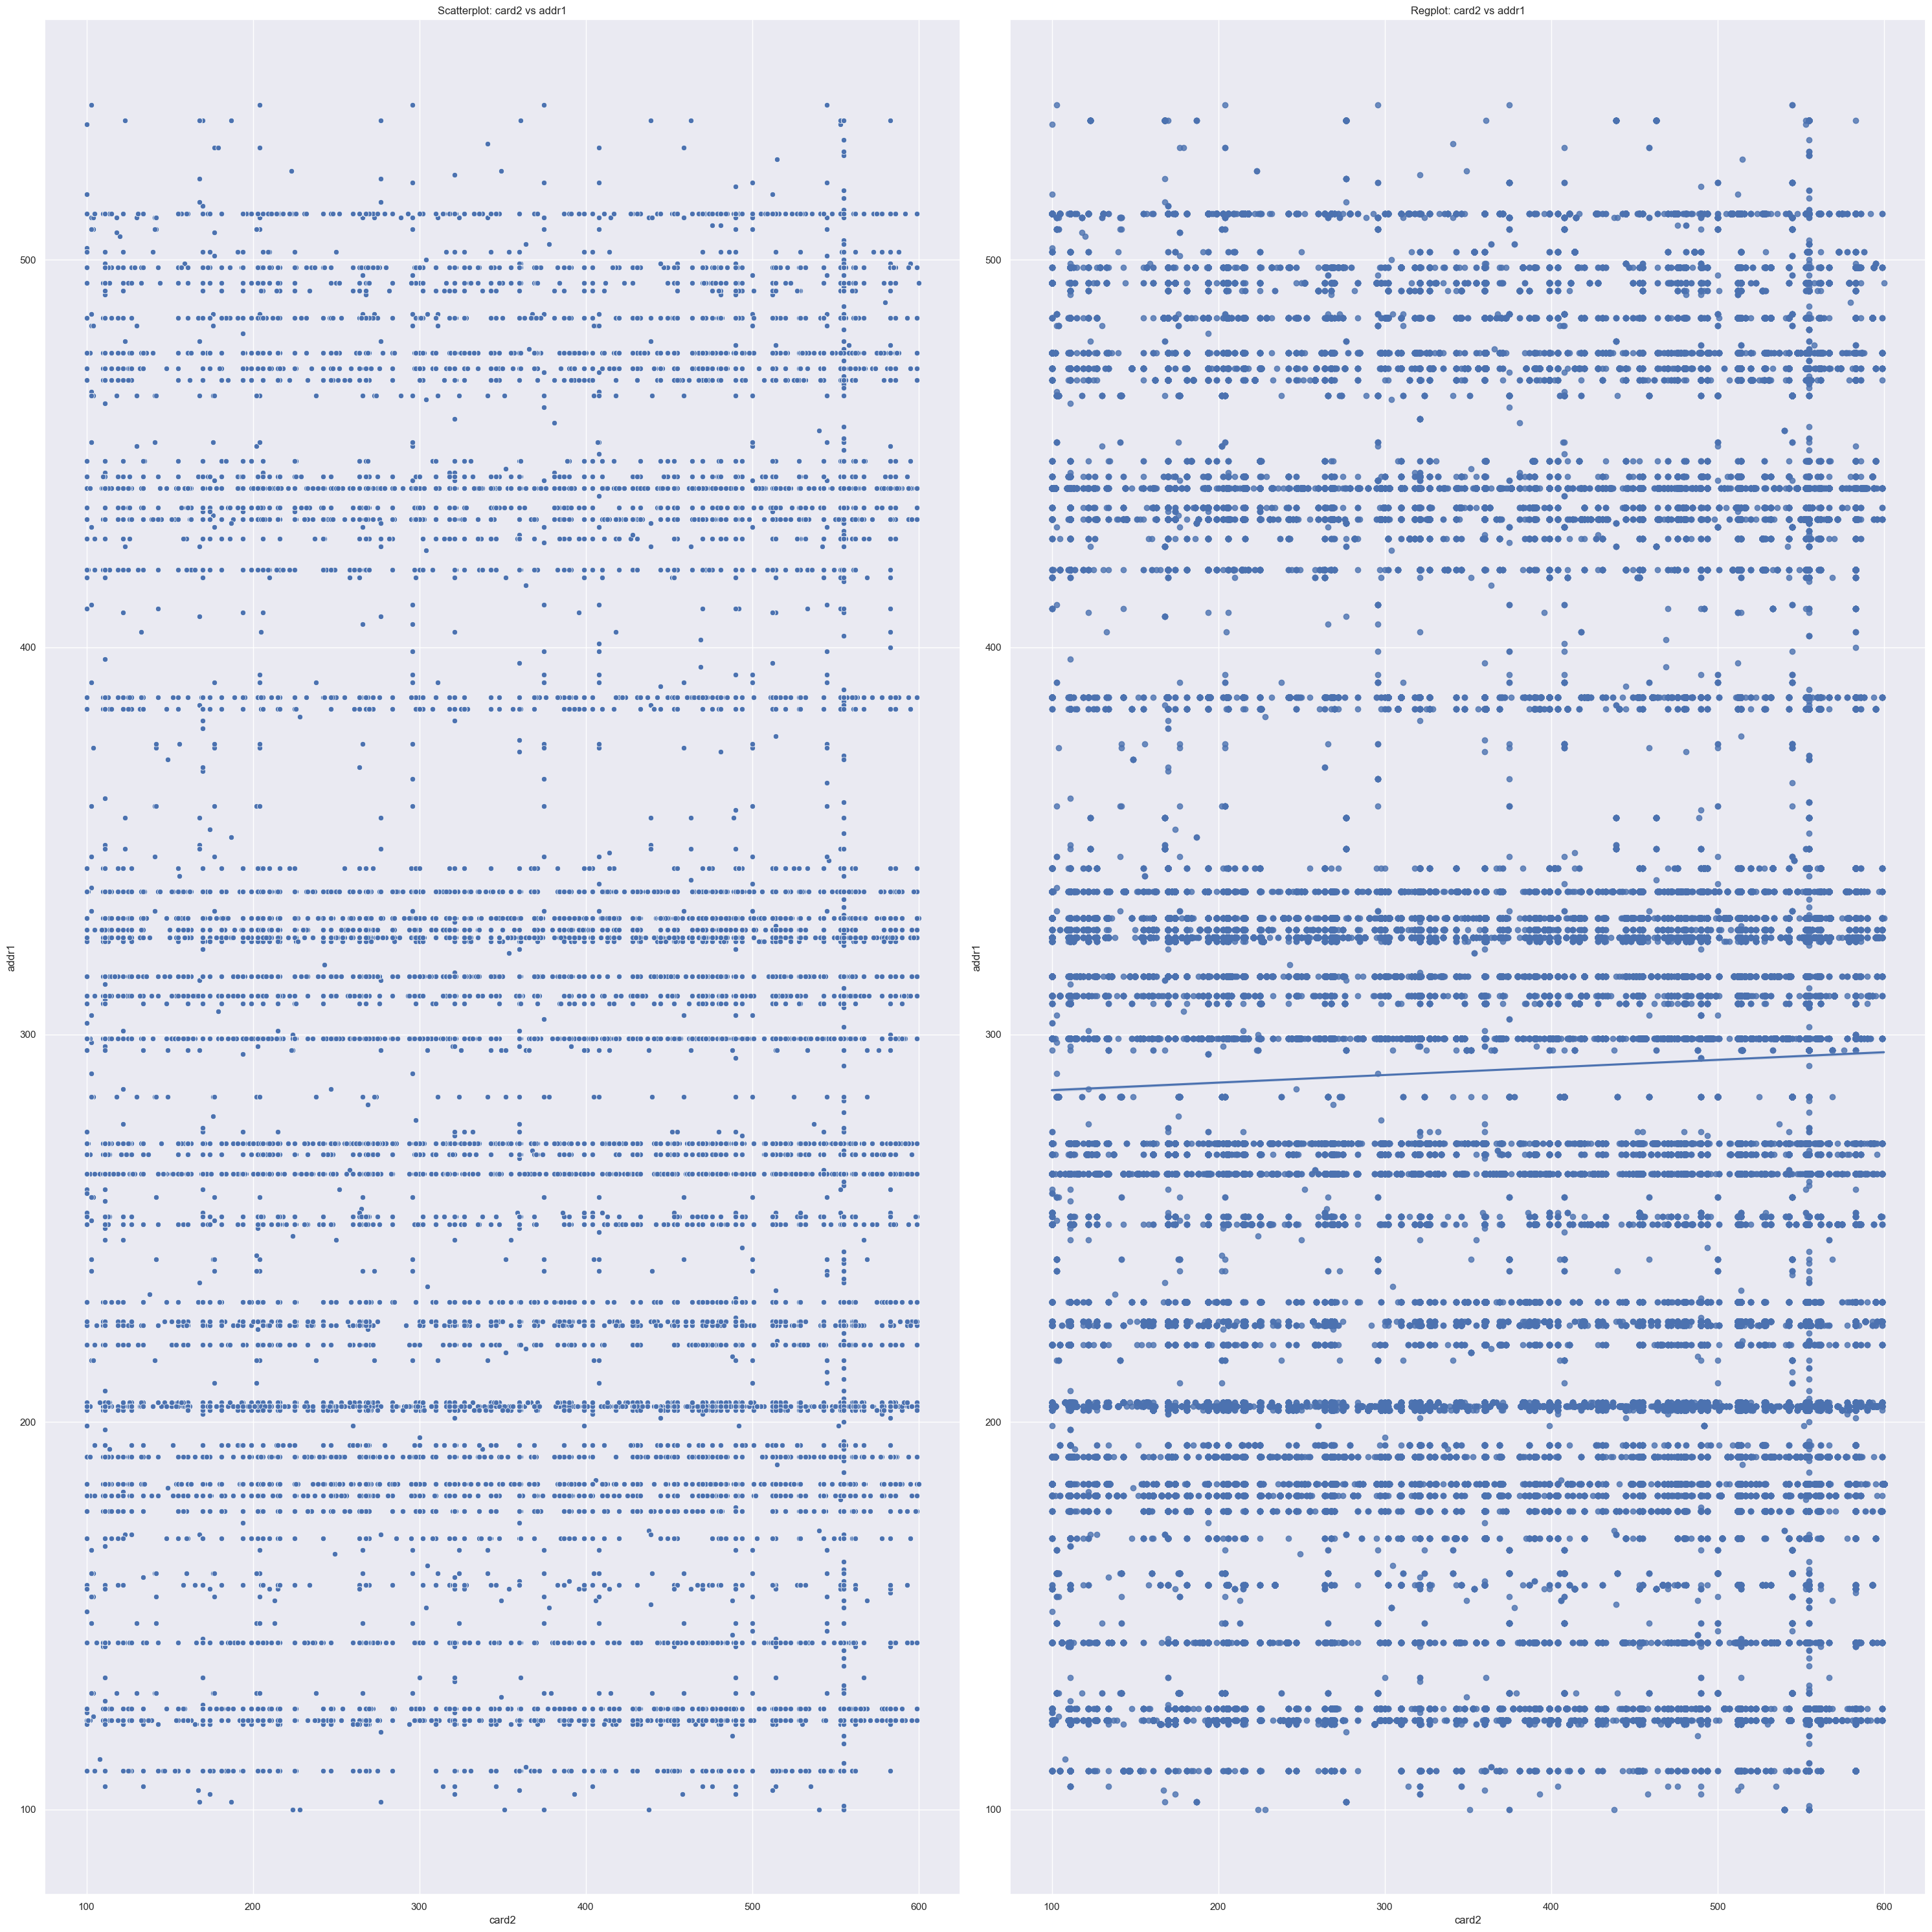

In [22]:
plt.figure(figsize=(30, 30))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='card2', y='addr1')
plt.title('Scatterplot: card2 vs addr1')

plt.subplot(1, 2, 2)
sns.regplot(data=df, x='card2', y='addr1')
plt.title('Regplot: card2 vs addr1')

plt.tight_layout()
plt.show()

Los gráficos anteriores no muestran con claridad si hay alguna relación lineal entre las variables. la línea de tendencia nos muestra que a medida que aumenta card2 , addr1 también

## Reducción de dimensionalidad:

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [24]:
verificacion_NA = df.isna().sum()
verificacion_NA

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
V335              508189
V336              508189
V337              508189
V338              508189
V339              508189
Length: 394, dtype: int64

In [25]:
porcentaje_faltante_col = ((verificacion_NA / len(df)) * 100)
porcentaje_faltante_col

TransactionID      0.000000
isFraud            0.000000
TransactionDT      0.000000
TransactionAmt     0.000000
ProductCD          0.000000
                    ...    
V335              86.054967
V336              86.054967
V337              86.054967
V338              86.054967
V339              86.054967
Length: 394, dtype: float64

Dado que hay muchas columnas del dataset con datos faltantes que representan una cantidad considerable, he definido un umbral inicial de 15%. Aquellas columnas que tengan el 15% de la muestra sin registros serán eliminadas, esto debido a que son demasiados datos faltantes y una imputación de la mediana para tantos datos no sería apropiado

In [26]:
#eliminar las columnas con un porcentaje de valores faltantes mayor al 20%.
umbral = 15
# columnas que cumplen con el criterio de porcentaje faltante mayor al umbral.
columnas_a_eliminar = porcentaje_faltante_col[porcentaje_faltante_col > umbral].index.tolist()
len(columnas_a_eliminar)


234

In [27]:
# Eliminar las columnas del DataFrame original.
df.drop(columns=columnas_a_eliminar, axis=1, inplace=True)

eliminando las columnas con más de 15% de datos faltantes, nos quedan un total de 160 atributos:

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 160 entries, TransactionID to V321
dtypes: float64(153), int64(4), object(3)
memory usage: 720.9+ MB


In [29]:
ver_NA = df.isna().sum()
ver_NA

TransactionID      0
isFraud            0
TransactionDT      0
TransactionAmt     0
ProductCD          0
                  ..
V317              12
V318              12
V319              12
V320              12
V321              12
Length: 160, dtype: int64

In [30]:
faltante_col = ((ver_NA / len(df)) * 100)
faltante_col

TransactionID     0.000000
isFraud           0.000000
TransactionDT     0.000000
TransactionAmt    0.000000
ProductCD         0.000000
                    ...   
V317              0.002032
V318              0.002032
V319              0.002032
V320              0.002032
V321              0.002032
Length: 160, dtype: float64

Podemos ver que el nuevo dataset con 160 atributos cuenta con una proporción baja de datos faltantes. Se procede a continuar con el tratamiento de los datos faltantes.

### Imputación a datos faltantes: 

Para los datos numéricos se imputará con la mediana aquellos datos faltantes.

In [31]:
df.describe().T

count          mean           std          min  \
TransactionID   590540.0  3.282270e+06  1.704744e+05  2987000.000   
isFraud         590540.0  3.499001e-02  1.837546e-01        0.000   
TransactionDT   590540.0  7.372311e+06  4.617224e+06    86400.000   
TransactionAmt  590540.0  1.350272e+02  2.391625e+02        0.251   
card1           590540.0  9.898735e+03  4.901170e+03     1000.000   
...                  ...           ...           ...          ...   
V317            590528.0  2.476067e+02  3.980043e+03        0.000   
V318            590528.0  1.621534e+02  2.793344e+03        0.000   
V319            590528.0  1.837248e+01  3.323048e+02        0.000   
V320            590528.0  4.207313e+01  4.734993e+02        0.000   
V321            590528.0  2.832658e+01  3.820532e+02        0.000   

                        25%          50%          75%           max  
TransactionID   3134634.750  3282269.500   3429904.25  3.577539e+06  
isFraud               0.000        0.000         0.00  1.000000e+00  
TransactionDT   3027057.750  7306527.500  11246620.00  1.581113e+07  
TransactionAmt       43.321       68.769       125.00  3.193739e+04  
card1              6019.000     9678.000     14184.00  1.839600e+04  
...                     ...          ...          ...           ...  
V317                  0.000        0.000         0.00  1.340210e+05  
V318                  0.000        0.000         0.00  9.847600e+04  
V319                  0.000        0.000         0.00  1.040600e+05  
V320                  0.000        0.000         0.00  1.040600e+05  
V321                  0.000        0.000         0.00  1.040600e+05  

[157 rows x 8 columns]

In [32]:
C_categorica=df.select_dtypes(include=['object']).columns
C_numerica = df.select_dtypes(include=np.number).columns.tolist()
print("Variables categóricas:")
print(C_categorica)
print("Variables numéricas:")
print(C_numerica)

Variables categóricas:
Index(['ProductCD', 'card4', 'card6'], dtype='object')
Variables numéricas:
['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D10', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V279', 'V280', 'V281', 'V2

In [33]:
for col in C_numerica:
    m_norm_loss = df[col].median(axis=0)
    df[col].replace(np.nan, m_norm_loss, inplace=True)
    

In [34]:
veri_NA = df.isna().sum()
veri_NA

TransactionID     0
isFraud           0
TransactionDT     0
TransactionAmt    0
ProductCD         0
                 ..
V317              0
V318              0
V319              0
V320              0
V321              0
Length: 160, dtype: int64

In [35]:
df.describe().T

count          mean           std          min  \
TransactionID   590540.0  3.282270e+06  1.704744e+05  2987000.000   
isFraud         590540.0  3.499001e-02  1.837546e-01        0.000   
TransactionDT   590540.0  7.372311e+06  4.617224e+06    86400.000   
TransactionAmt  590540.0  1.350272e+02  2.391625e+02        0.251   
card1           590540.0  9.898735e+03  4.901170e+03     1000.000   
...                  ...           ...           ...          ...   
V317            590540.0  2.476017e+02  3.980003e+03        0.000   
V318            590540.0  1.621501e+02  2.793315e+03        0.000   
V319            590540.0  1.837210e+01  3.323015e+02        0.000   
V320            590540.0  4.207228e+01  4.734945e+02        0.000   
V321            590540.0  2.832601e+01  3.820493e+02        0.000   

                        25%          50%          75%           max  
TransactionID   3134634.750  3282269.500   3429904.25  3.577539e+06  
isFraud               0.000        0.000         0.00  1.000000e+00  
TransactionDT   3027057.750  7306527.500  11246620.00  1.581113e+07  
TransactionAmt       43.321       68.769       125.00  3.193739e+04  
card1              6019.000     9678.000     14184.00  1.839600e+04  
...                     ...          ...          ...           ...  
V317                  0.000        0.000         0.00  1.340210e+05  
V318                  0.000        0.000         0.00  9.847600e+04  
V319                  0.000        0.000         0.00  1.040600e+05  
V320                  0.000        0.000         0.00  1.040600e+05  
V321                  0.000        0.000         0.00  1.040600e+05  

[157 rows x 8 columns]

Ahora, verifiquemos datos faltantes en las variables categóricas:

In [36]:
print(C_categorica)

Index(['ProductCD', 'card4', 'card6'], dtype='object')


In [37]:
for col in C_categorica:
    print(df[col].isna().sum())

0
1577
1571


In [38]:
for col in C_categorica:
    print(((df[col].isna().sum())/len(df))*100)

0.0
0.267043722694483
0.26602770345785215


Vemos que dos variables categóricas tienen aproximadamente un 0.26% de datos faltantes; calcularemos la frecuencia de las categorías en dichas variables:

- card4:

In [39]:
df['card4'].value_counts()

card4
visa                384767
mastercard          189217
american express      8328
discover              6651
Name: count, dtype: int64

Reemplazamos los valores faltantes de la variable 'card4' por el valor que más se repite:

In [40]:
df['card4'].replace(np.nan, "visa", inplace=True)

- card6:

In [41]:
df['card6'].value_counts()

card6
debit              439938
credit             148986
debit or credit        30
charge card            15
Name: count, dtype: int64

Reemplazamos los valores faltantes de la variable 'card6' por el valor que más se repite:

In [42]:
df['card6'].replace(np.nan, "debit", inplace=True)

Verifiquemos ahora los datos faltantes:

In [43]:
for col in C_categorica:
    print(df[col].isna().sum())

0
0
0


Dataset resultante no tiene filas con datos faltantes.

In [44]:
filas_con_datos_faltantes = df.isna().any(axis=1)
filas_con_datos_faltantes

0         False
1         False
2         False
3         False
4         False
          ...  
590535    False
590536    False
590537    False
590538    False
590539    False
Length: 590540, dtype: bool

In [45]:
if not filas_con_datos_faltantes.any():
    print("Todas las filas tienen datos completos ")
else:
    print("Al menos una fila tiene datos faltantes")

Todas las filas tienen datos completos 


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 160 entries, TransactionID to V321
dtypes: float64(153), int64(4), object(3)
memory usage: 720.9+ MB


Tenemos finalmente un dataset de 590540 registros y 160 atributos. Procedemos a utilizar la técnica Variance Inflation Factor, para realizar
reducción de dimensionalidad por medio de eliminiación de columnas altamente correlacionadas

### VIF:

Primeramente, excluimos la variable dependiente y realizamos OneHotEncoder para las variables categoricas ('ProductCD', 'card4', 'card6')

In [47]:
df_new=df.drop('isFraud', axis=1)
df_new.head()

TransactionID  TransactionDT  TransactionAmt ProductCD  card1  card2  \
0        2987000          86400            68.5         W  13926  361.0   
1        2987001          86401            29.0         W   2755  404.0   
2        2987002          86469            59.0         W   4663  490.0   
3        2987003          86499            50.0         W  18132  567.0   
4        2987004          86506            50.0         H   4497  514.0   

   card3       card4  card5   card6  ...   V312  V313  V314  V315  V316  \
0  150.0    discover  142.0  credit  ...    0.0   0.0   0.0   0.0   0.0   
1  150.0  mastercard  102.0  credit  ...    0.0   0.0   0.0   0.0   0.0   
2  150.0        visa  166.0   debit  ...    0.0   0.0   0.0   0.0   0.0   
3  150.0  mastercard  117.0   debit  ...  135.0   0.0   0.0   0.0  50.0   
4  150.0  mastercard  102.0  credit  ...    0.0   0.0   0.0   0.0   0.0   

     V317   V318  V319  V320  V321  
0   117.0    0.0   0.0   0.0   0.0  
1     0.0    0.0   0.0   0.0   0.0  
2     0.0    0.0   0.0   0.0   0.0  
3  1404.0  790.0   0.0   0.0   0.0  
4     0.0    0.0   0.0   0.0   0.0  

[5 rows x 159 columns]

In [48]:
df_new['ProductCD'].unique()

array(['W', 'H', 'C', 'S', 'R'], dtype=object)

In [49]:
df_new['card4'].unique()

array(['discover', 'mastercard', 'visa', 'american express'], dtype=object)

In [50]:
df_new['card6'].unique()

array(['credit', 'debit', 'debit or credit', 'charge card'], dtype=object)

- OneHotEncoder para variables categóricas:


In [51]:
encoder = OneHotEncoder()
X = df_new['ProductCD'].values.reshape(-1, 1)
enc = OneHotEncoder(drop='first').fit(X)
X = enc.transform(X).toarray()
X1=df_new['card4'].values.reshape(-1, 1)
enc1=OneHotEncoder(drop='first').fit(X1)
X1 = enc1.transform(X1).toarray()
X2=df_new['card6'].values.reshape(-1, 1)
enc2=OneHotEncoder(drop='first').fit(X2)
X2=enc2.transform(X2).toarray()


In [52]:
X

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [53]:
X1

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [54]:
X2

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

A continuación creamos un dataframe a partir de las variables previamente procesadas por OneHotEncoder, se eliminó una etiqueta por variable para evitar multicolinealidad.

In [55]:
X_encoded_df = pd.DataFrame(X, columns= enc.get_feature_names_out(['ProductCD']))
X1_encoded_df = pd.DataFrame(X1, columns= enc1.get_feature_names_out(['card4']))
X2_encoded_df = pd.DataFrame(X2, columns= enc2.get_feature_names_out(['card6']))
encoded_df = pd.concat([X_encoded_df,X1_encoded_df,X2_encoded_df], axis=1)
encoded_df.head()

ProductCD_H  ProductCD_R  ProductCD_S  ProductCD_W  card4_discover  \
0          0.0          0.0          0.0          1.0             1.0   
1          0.0          0.0          0.0          1.0             0.0   
2          0.0          0.0          0.0          1.0             0.0   
3          0.0          0.0          0.0          1.0             0.0   
4          1.0          0.0          0.0          0.0             0.0   

   card4_mastercard  card4_visa  card6_credit  card6_debit  \
0               0.0         0.0           1.0          0.0   
1               1.0         0.0           1.0          0.0   
2               0.0         1.0           0.0          1.0   
3               1.0         0.0           0.0          1.0   
4               1.0         0.0           1.0          0.0   

   card6_debit or credit  
0                    0.0  
1                    0.0  
2                    0.0  
3                    0.0  
4                    0.0

Concatenamos este dataframe con el original(con solo las variables numéricas):

In [56]:
df_new_num=df_new.drop(['ProductCD','card4', 'card6'], axis=1)
df_new_num.head()

TransactionID  TransactionDT  TransactionAmt  card1  card2  card3  card5  \
0        2987000          86400            68.5  13926  361.0  150.0  142.0   
1        2987001          86401            29.0   2755  404.0  150.0  102.0   
2        2987002          86469            59.0   4663  490.0  150.0  166.0   
3        2987003          86499            50.0  18132  567.0  150.0  117.0   
4        2987004          86506            50.0   4497  514.0  150.0  102.0   

   addr1  addr2   C1  ...   V312  V313  V314  V315  V316    V317   V318  V319  \
0  315.0   87.0  1.0  ...    0.0   0.0   0.0   0.0   0.0   117.0    0.0   0.0   
1  325.0   87.0  1.0  ...    0.0   0.0   0.0   0.0   0.0     0.0    0.0   0.0   
2  330.0   87.0  1.0  ...    0.0   0.0   0.0   0.0   0.0     0.0    0.0   0.0   
3  476.0   87.0  2.0  ...  135.0   0.0   0.0   0.0  50.0  1404.0  790.0   0.0   
4  420.0   87.0  1.0  ...    0.0   0.0   0.0   0.0   0.0     0.0    0.0   0.0   

   V320  V321  
0   0.0   0.0  
1   0.0   0.0  
2   0.0   0.0  
3   0.0   0.0  
4   0.0   0.0  

[5 rows x 156 columns]

In [57]:
df_01 = pd.concat([df_new_num, encoded_df], axis=1)
df_01

TransactionID  TransactionDT  TransactionAmt  card1  card2  card3  \
0             2987000          86400           68.50  13926  361.0  150.0   
1             2987001          86401           29.00   2755  404.0  150.0   
2             2987002          86469           59.00   4663  490.0  150.0   
3             2987003          86499           50.00  18132  567.0  150.0   
4             2987004          86506           50.00   4497  514.0  150.0   
...               ...            ...             ...    ...    ...    ...   
590535        3577535       15811047           49.00   6550  361.0  150.0   
590536        3577536       15811049           39.50  10444  225.0  150.0   
590537        3577537       15811079           30.95  12037  595.0  150.0   
590538        3577538       15811088          117.00   7826  481.0  150.0   
590539        3577539       15811131          279.95  15066  170.0  150.0   

        card5  addr1  addr2   C1  ...  ProductCD_H  ProductCD_R  ProductCD_S  \
0       142.0  315.0   87.0  1.0  ...          0.0          0.0          0.0   
1       102.0  325.0   87.0  1.0  ...          0.0          0.0          0.0   
2       166.0  330.0   87.0  1.0  ...          0.0          0.0          0.0   
3       117.0  476.0   87.0  2.0  ...          0.0          0.0          0.0   
4       102.0  420.0   87.0  1.0  ...          1.0          0.0          0.0   
...       ...    ...    ...  ...  ...          ...          ...          ...   
590535  226.0  272.0   87.0  2.0  ...          0.0          0.0          0.0   
590536  224.0  204.0   87.0  1.0  ...          0.0          0.0          0.0   
590537  224.0  231.0   87.0  1.0  ...          0.0          0.0          0.0   
590538  224.0  387.0   87.0  1.0  ...          0.0          0.0          0.0   
590539  102.0  299.0   87.0  2.0  ...          0.0          0.0          0.0   

        ProductCD_W  card4_discover  card4_mastercard  card4_visa  \
0               1.0             1.0               0.0         0.0   
1               1.0             0.0               1.0         0.0   
2               1.0             0.0               0.0         1.0   
3               1.0             0.0               1.0         0.0   
4               0.0             0.0               1.0         0.0   
...             ...             ...               ...         ...   
590535          1.0             0.0               0.0         1.0   
590536          1.0             0.0               1.0         0.0   
590537          1.0             0.0               1.0         0.0   
590538          1.0             0.0               1.0         0.0   
590539          1.0             0.0               1.0         0.0   

        card6_credit  card6_debit  card6_debit or credit  
0                1.0          0.0                    0.0  
1                1.0          0.0                    0.0  
2                0.0          1.0                    0.0  
3                0.0          1.0                    0.0  
4                1.0          0.0                    0.0  
...              ...          ...                    ...  
590535           0.0          1.0                    0.0  
590536           0.0          1.0                    0.0  
590537           0.0          1.0                    0.0  
590538           0.0          1.0                    0.0  
590539           1.0          0.0                    0.0  

[590540 rows x 166 columns]

# PREDICCIÓN DE LA VELOCIDAD DEL VIENTO:

## Analisis exploratorio de los datos:

In [58]:
archivo_csv2 = "data_treino_dv_df_2000_2010.csv"
df2 = pd.read_csv(archivo_csv2)
print('All data shape: ', df2.shape)
df2.head()

All data shape:  (87693, 13)


HORA (UTC)  VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))  \
0      12:00                                    0.809017   
1      13:00                                    0.965926   
2      14:00                                    0.891007   
3      15:00                                    0.848048   
4      16:00                                    0.224951   

   VENTO, VELOCIDADE HORARIA (m/s)  UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)  \
0                              1.8                                      69.0   
1                              2.7                                      62.0   
2                              2.0                                      56.0   
3                              2.5                                      52.0   
4                              2.4                                      50.0   

   UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)  \
0                                      60.0   
1                                      55.0   
2                                      50.0   
3                                      44.0   
4                                      43.0   

   TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)  \
0                                            22.6   
1                                            24.2   
2                                            25.5   
3                                            27.4   
4                                            27.1   

   TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)  \
0                                            20.7   
1                                            22.5   
2                                            24.3   
3                                            25.0   
4                                            25.5   

   UMIDADE RELATIVA DO AR, HORARIA (%)  \
0                                 61.0   
1                                 55.0   
2                                 51.0   
3                                 44.0   
4                                 46.0   

   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  \
0                                              888.2       
1                                              888.4       
2                                              888.1       
3                                              887.4       
4                                              886.5       

   PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)  VENTO, RAJADA MAXIMA (m/s)  \
0                                     0.0                         3.8   
1                                     0.0                         4.7   
2                                     0.0                         4.9   
3                                     0.0                         5.8   
4                                     0.0                         5.8   

   PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)  \
0                                              888.2   
1                                              888.4   
2                                              888.4   
3                                              888.1   
4                                              887.4   

   PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)  
0                                              887.7   
1                                              888.2   
2                                              888.1   
3                                              887.4   
4                                              886.5

La base de datos de velocidad del viento corresponde a 87693 registros y 13 atributos. 

In [59]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87693 entries, 0 to 87692
Data columns (total 13 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   HORA (UTC)                                             87693 non-null  object 
 1   VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))             87693 non-null  float64
 2   VENTO, VELOCIDADE HORARIA (m/s)                        87693 non-null  float64
 3   UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)               87693 non-null  float64
 4   UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)               87693 non-null  float64
 5   TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)         87693 non-null  float64
 6   TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)         87693 non-null  float64
 7   UMIDADE RELATIVA DO AR, HORARIA (%)                    87693 non-null  float64
 8   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORAR

Vemos que no hay datos faltantes , se tiene como variable categórica 'hora', y 12 variables numéricas. 

In [60]:
nuevos_nombres = ['hora', 'viento_direc', 'velocidad', 'AUT_max', 'AUT_min', 'TEMP_MAX', 'TEMP_MIN', 'REL_DO', 'atm', 'prec_total',
                  'Viento_rajmax', 'presion_max', 'presion_min']
df2.columns = nuevos_nombres

In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87693 entries, 0 to 87692
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hora           87693 non-null  object 
 1   viento_direc   87693 non-null  float64
 2   velocidad      87693 non-null  float64
 3   AUT_max        87693 non-null  float64
 4   AUT_min        87693 non-null  float64
 5   TEMP_MAX       87693 non-null  float64
 6   TEMP_MIN       87693 non-null  float64
 7   REL_DO         87693 non-null  float64
 8   atm            87693 non-null  float64
 9   prec_total     87693 non-null  float64
 10  Viento_rajmax  87693 non-null  float64
 11  presion_max    87693 non-null  float64
 12  presion_min    87693 non-null  float64
dtypes: float64(12), object(1)
memory usage: 8.7+ MB


In [62]:
df2.describe().T

count        mean        std    min         25%         50%  \
viento_direc   87693.0    0.405810   0.686247   -1.0   -0.156434    0.788011   
velocidad      87693.0    2.466192   1.313968    0.0    1.500000    2.400000   
AUT_max        87693.0   69.058465  19.640222   12.0   54.000000   72.000000   
AUT_min        87693.0   63.176194  20.166336   10.0   48.000000   64.000000   
TEMP_MAX       87693.0   21.921264   3.721386    9.2   19.200000   21.400000   
TEMP_MIN       87693.0   20.684570   3.513744    8.4   18.400000   20.200000   
REL_DO         87693.0   66.146682  19.992327   10.0   51.000000   68.000000   
atm            87693.0  887.251925   4.012404  863.4  885.300000  887.200000   
prec_total     87693.0    0.160907   1.307515    0.0    0.000000    0.000000   
Viento_rajmax  87693.0    5.161076   2.311157    0.0    3.400000    5.000000   
presion_max    87693.0  887.580724   3.646750  865.3  885.600000  887.500000   
presion_min    87693.0  886.891093   3.564539  862.8  885.000000  886.900000   

                      75%     max  
viento_direc     0.970296     1.0  
velocidad        3.400000    10.0  
AUT_max         87.000000   100.0  
AUT_min         80.000000    98.0  
TEMP_MAX        24.700000    35.3  
TEMP_MIN        23.100000    34.4  
REL_DO          84.000000    99.0  
atm            889.100000  1023.5  
prec_total       0.000000    70.8  
Viento_rajmax    6.800000    24.3  
presion_max    889.300000   913.1  
presion_min    888.800000   910.9

- Estadística descriptiva: Media, desviasión estándar, mínimo, máximo, cuartiles

Del análisis anterior, tenemos que:

La velocidad del viento (m/s) tiene registros mínimos de 0 y máximo de 10, con una velocidad promedio de 2.47m/s. el 75% de los registros son velocidades de viento interiores a 3.4 m/s.

La temperatura máxima y mínima registrada tienen valores promedios similares, siendo la máxima de 21,9 grados y la mínima de 20.68 grados.

los registros de rpesión atmosférica promedio fueron de 887 atmósferas con una desviación de 4.01 atm, con un registro máximo de 1023,5 atm.

Vemos que muchos atributos están en diferentes escalas de medida. 



- Conteo de datos faltantes:

In [63]:
all_NA = df2.isna().sum()
pd.concat([all_NA], axis=1, sort = False, keys = [ 'All NA'])

All NA
hora                0
viento_direc        0
velocidad           0
AUT_max             0
AUT_min             0
TEMP_MAX            0
TEMP_MIN            0
REL_DO              0
atm                 0
prec_total          0
Viento_rajmax       0
presion_max         0
presion_min         0

En la base de datos no se registran datos faltantes. 

### Histograma y Diagrama de barras:

In [64]:
cate_cols=df2.select_dtypes(include=['object']).columns
nume_cols = df2.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cate_cols)
print("Numerical Variables:")
print(nume_cols)

Categorical Variables:
Index(['hora'], dtype='object')
Numerical Variables:
['viento_direc', 'velocidad', 'AUT_max', 'AUT_min', 'TEMP_MAX', 'TEMP_MIN', 'REL_DO', 'atm', 'prec_total', 'Viento_rajmax', 'presion_max', 'presion_min']


Column:  viento_direc
Skew: -0.86
Kurtosis:  -0.82


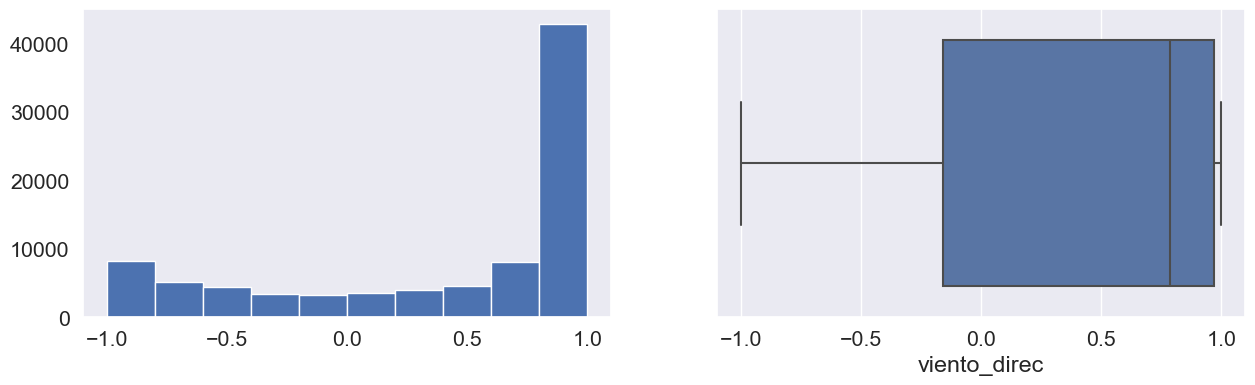

Column:  velocidad
Skew: 0.37
Kurtosis:  -0.11


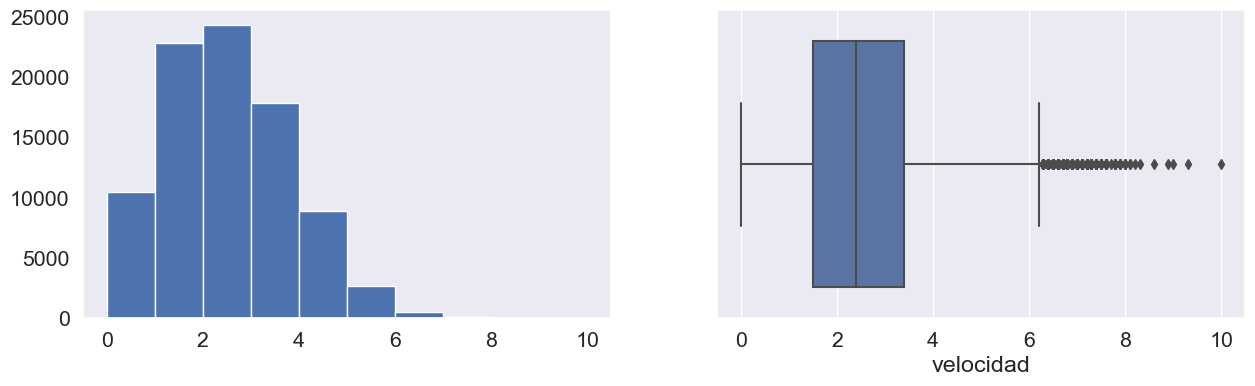

Column:  AUT_max
Skew: -0.48
Kurtosis:  -0.78


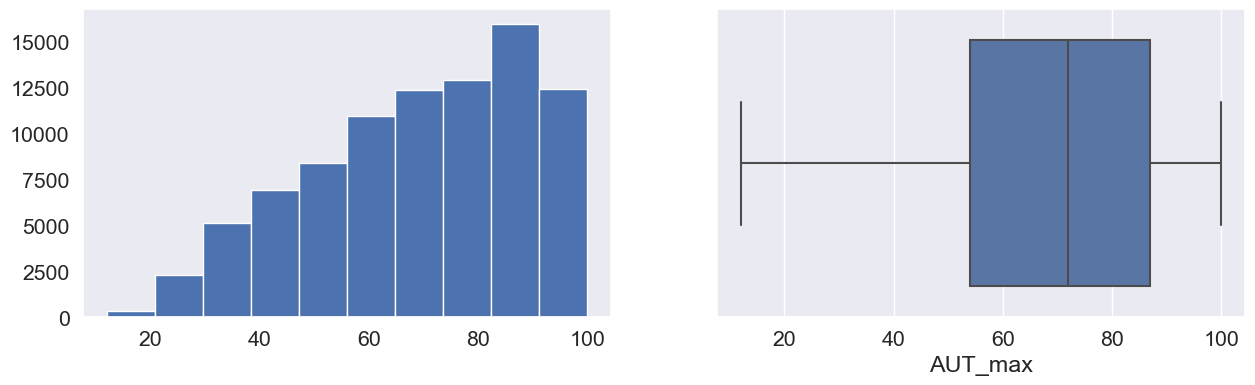

Column:  AUT_min
Skew: -0.23
Kurtosis:  -0.96


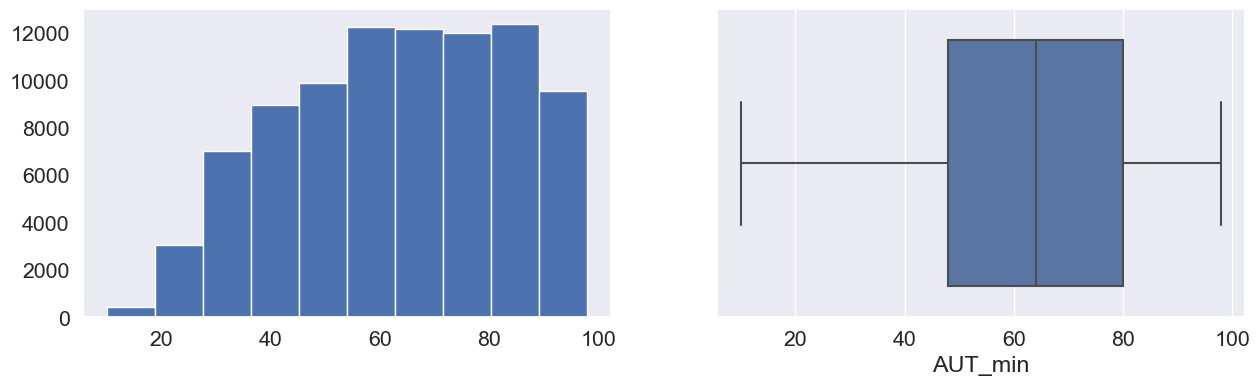

Column:  TEMP_MAX
Skew: 0.26
Kurtosis:  -0.42


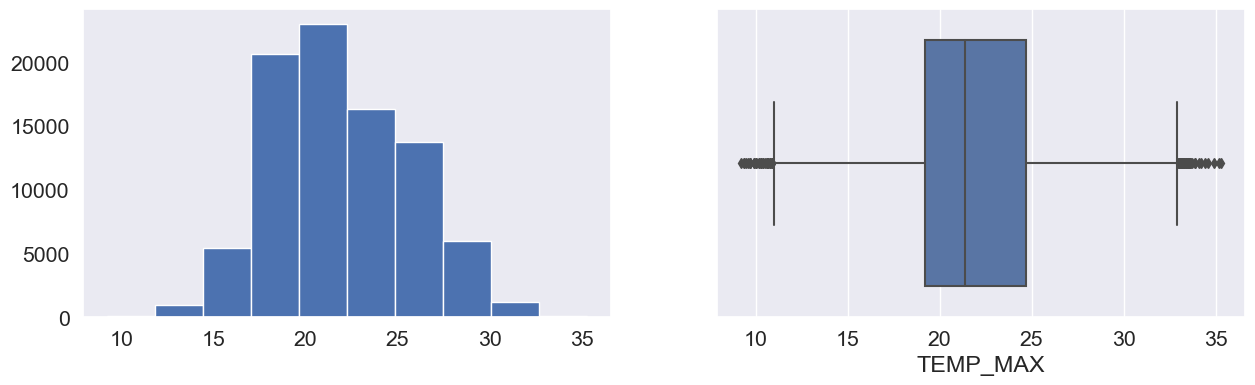

Column:  TEMP_MIN
Skew: 0.24
Kurtosis:  -0.12


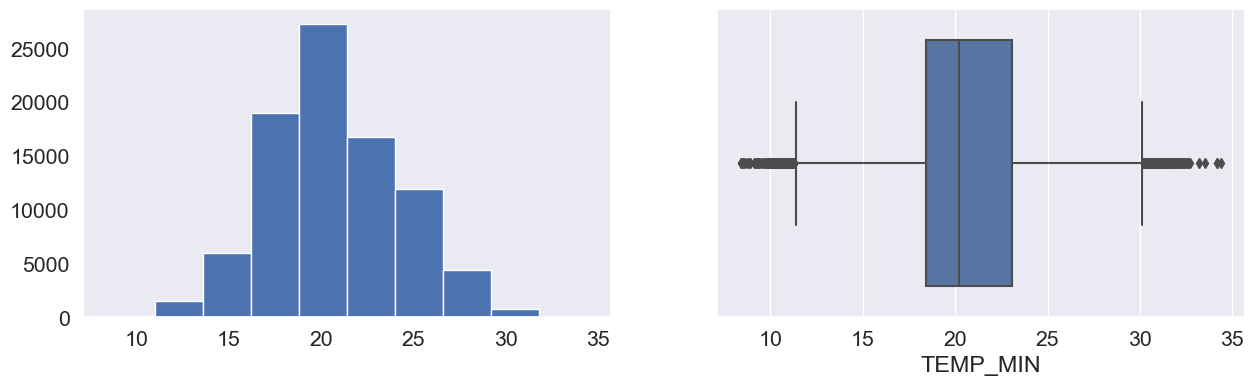

Column:  REL_DO
Skew: -0.35
Kurtosis:  -0.89


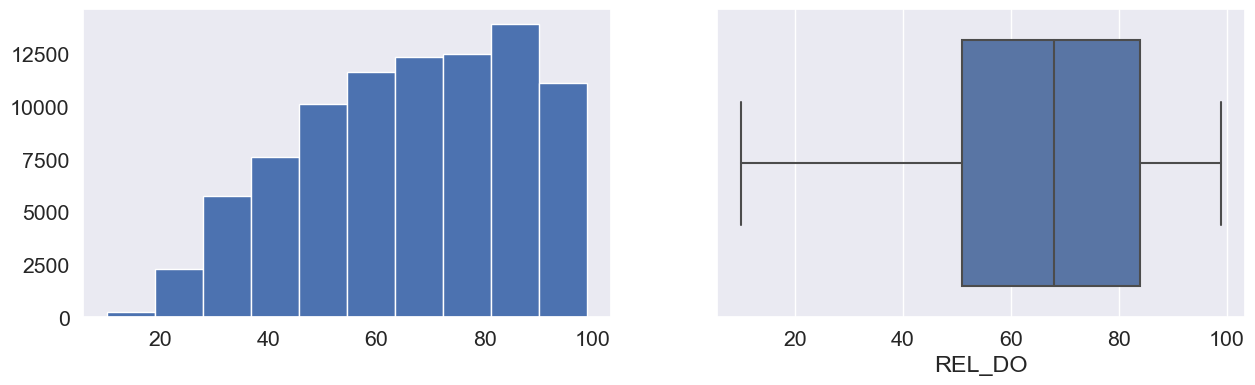

Column:  atm
Skew: 6.18
Kurtosis:  179.64


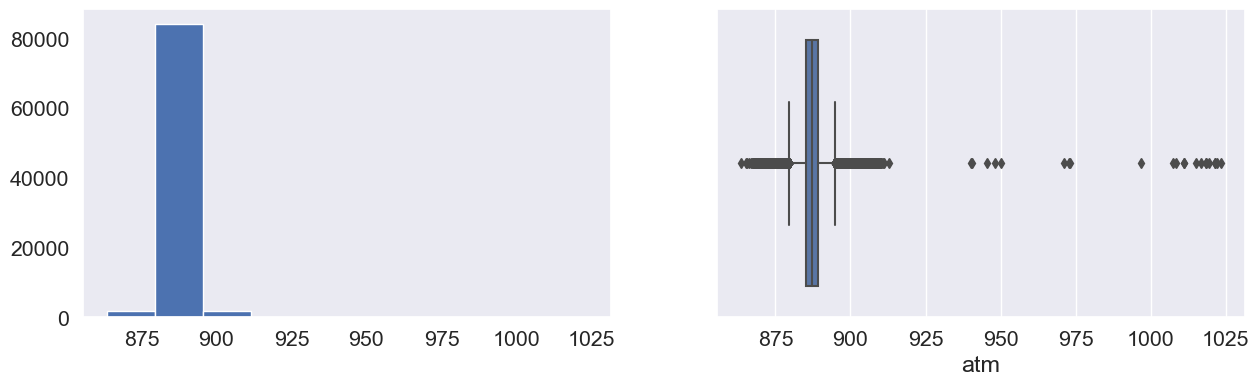

Column:  prec_total
Skew: 17.65
Kurtosis:  476.4


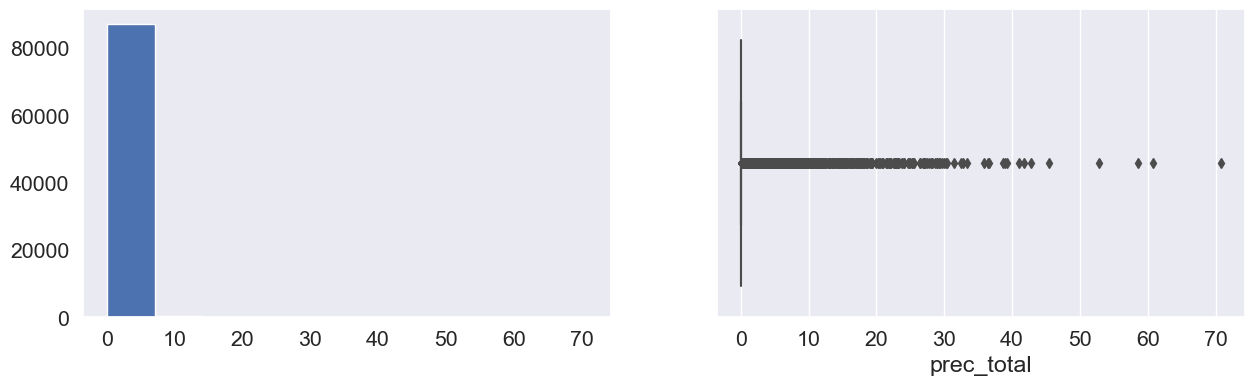

Column:  Viento_rajmax
Skew: 0.41
Kurtosis:  0.11


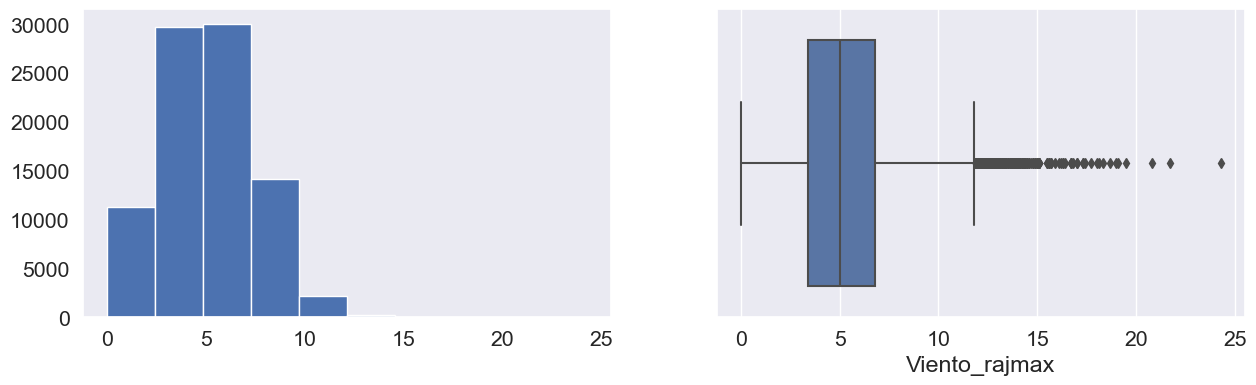

Column:  presion_max
Skew: 1.02
Kurtosis:  5.82


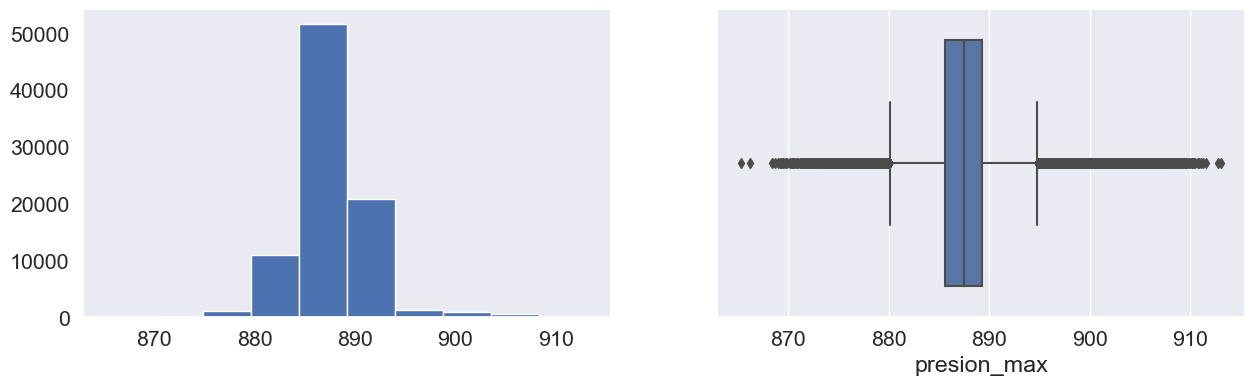

Column:  presion_min
Skew: 0.33
Kurtosis:  4.91


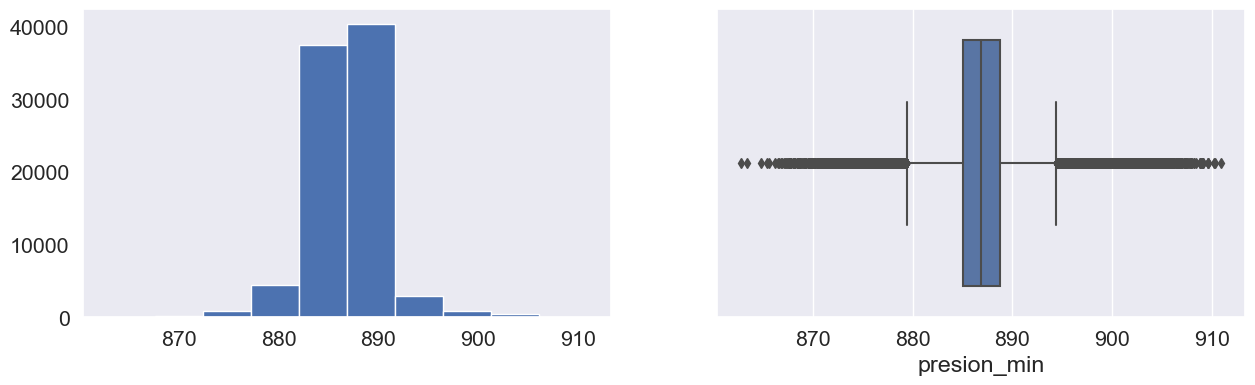

In [65]:
sns.set(font_scale=1.4)
for col in nume_cols:
    print('Column: ', col)
    print('Skew:', round(df2[col].skew(), 2))
    print('Kurtosis: ', round(df2[col].kurtosis(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df2[col].hist(grid=False)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df2[col])
    plt.show()

Vemos posibles datos atípicos en las variables presion_min, presion_max, prec_total, atm. 

La variable TEM_MIN muestra en el gráfico que posiblemente sigue una distribución normal. con un leve sesgo positivo (Mayor peso en la cola izquierda de la distribución), lo mismo ocurre con TEM_MAX.

La variable velocidad del viento se ve sesgada, con mayor pero en la cola izquierda, mientras que AUT_MAX Y aut_MIN muestran mayor peso en la cola derecha. 





La variable prec_total no evidencia que siga una distribución normal, los datos se concentran en la parte izquierda de la gráfica.

la variable Viento_rajmax también evidencia un sesgo positivo (skew>0)

se visualiza asimetría en varias variables, la variable TEM_MIN aunque está sesgada muestra un poco de simetría en comparación con las demás variables. 

### Análisis Bivariado:

In [66]:
def scatter_regplot(data, strx, stry):
    sns.set(font_scale=1.4)
    fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
    sns.scatterplot(data=data, x=strx, y=stry, ax=ax[0])
    sns.regplot(data=data, x=strx, y=stry, ax=ax[1]);
    fig.suptitle('Relación entre %s y velocidad'%col)

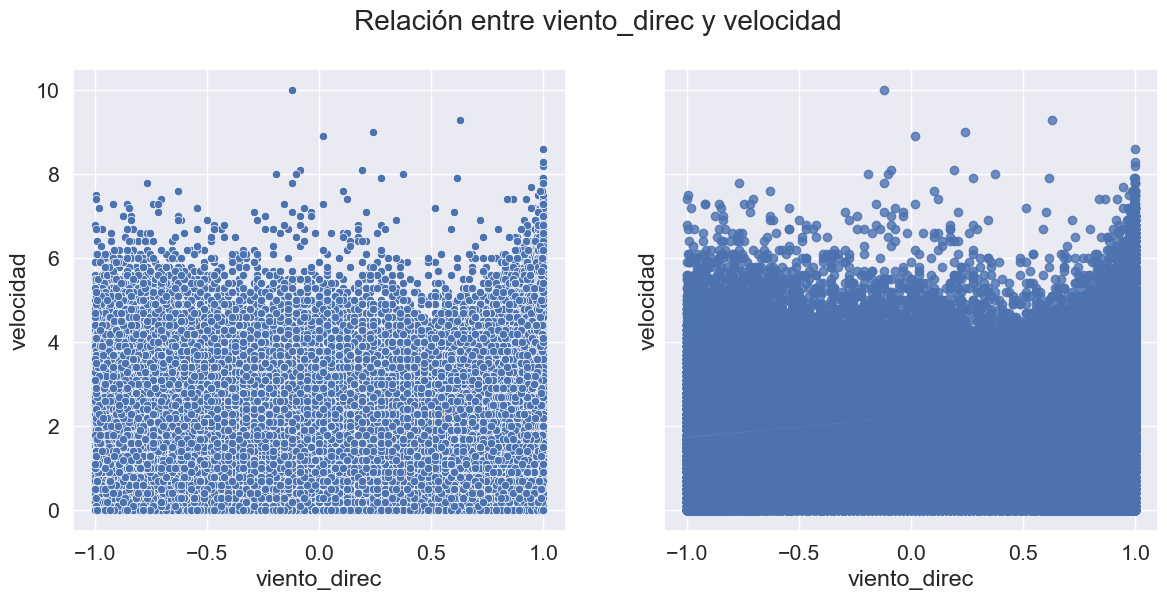

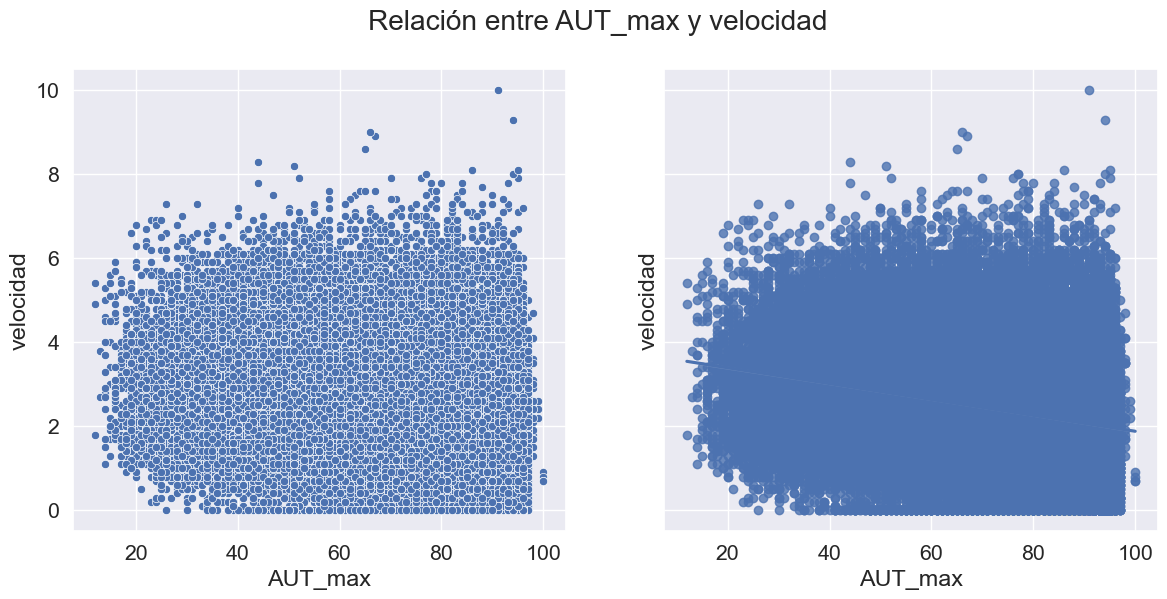

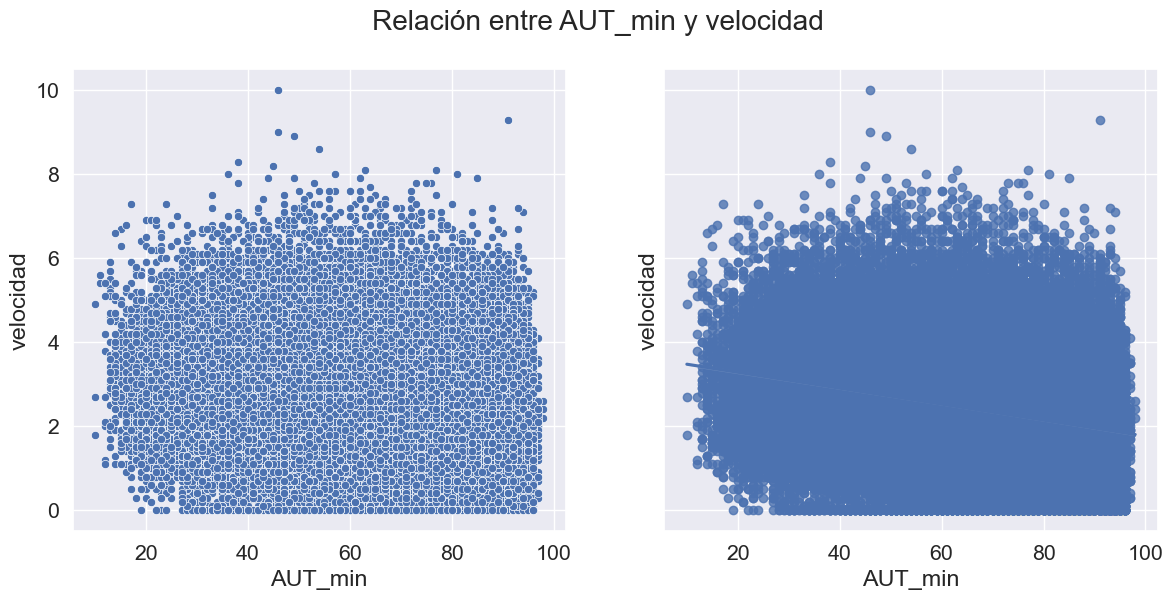

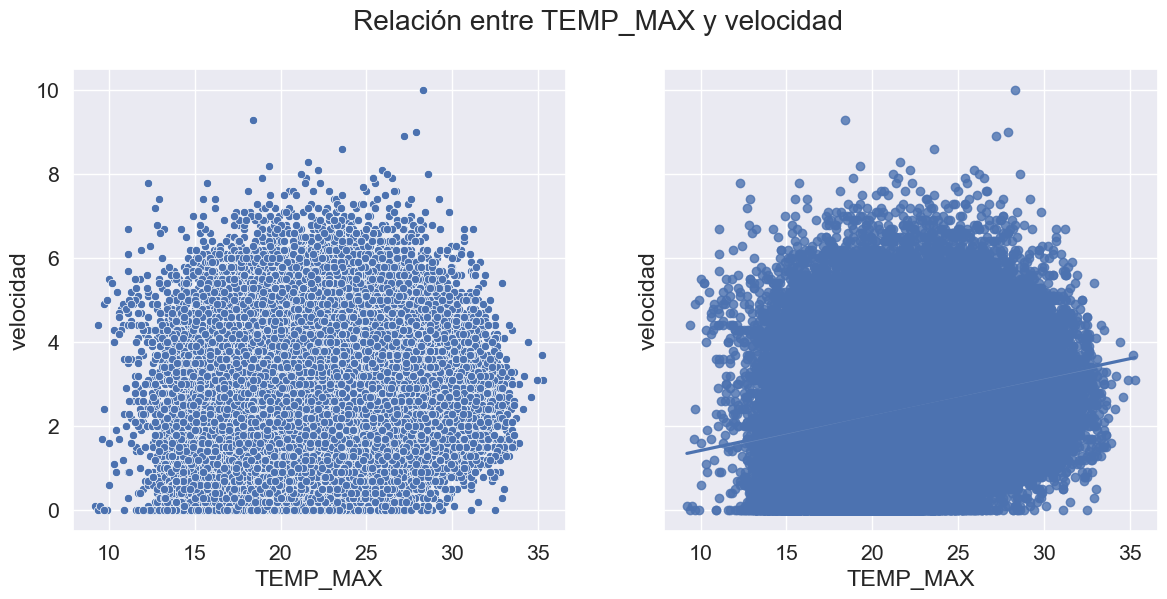

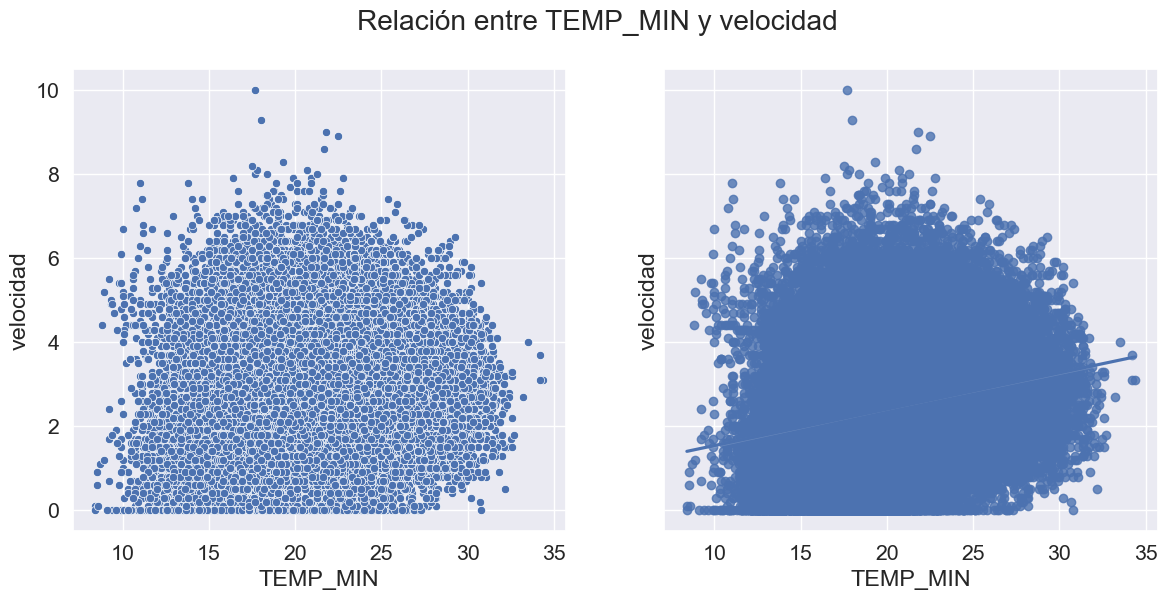

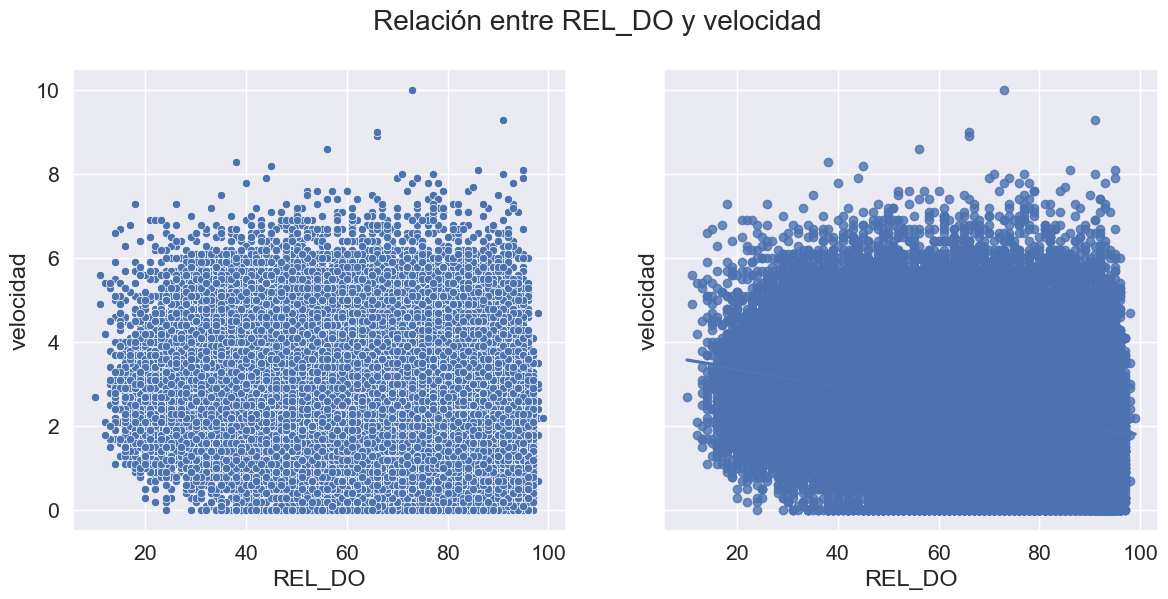

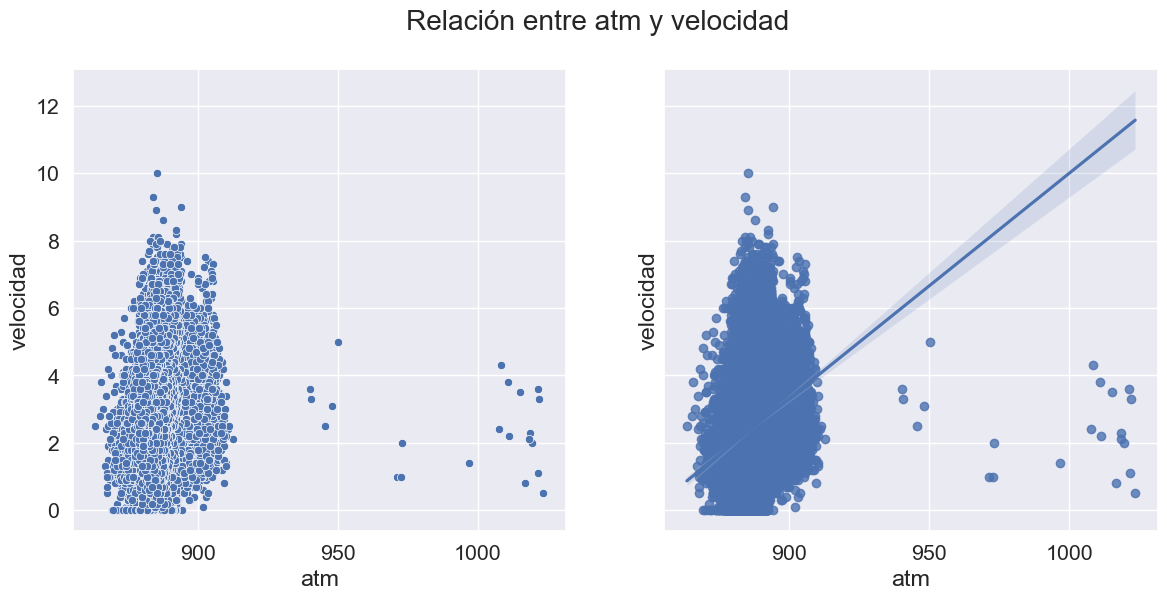

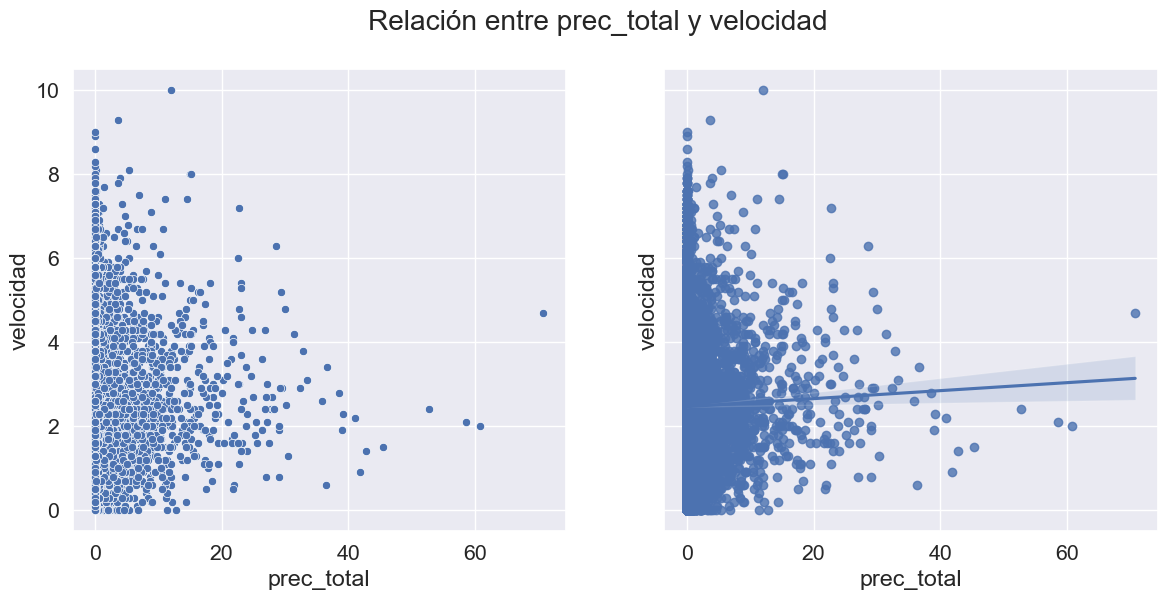

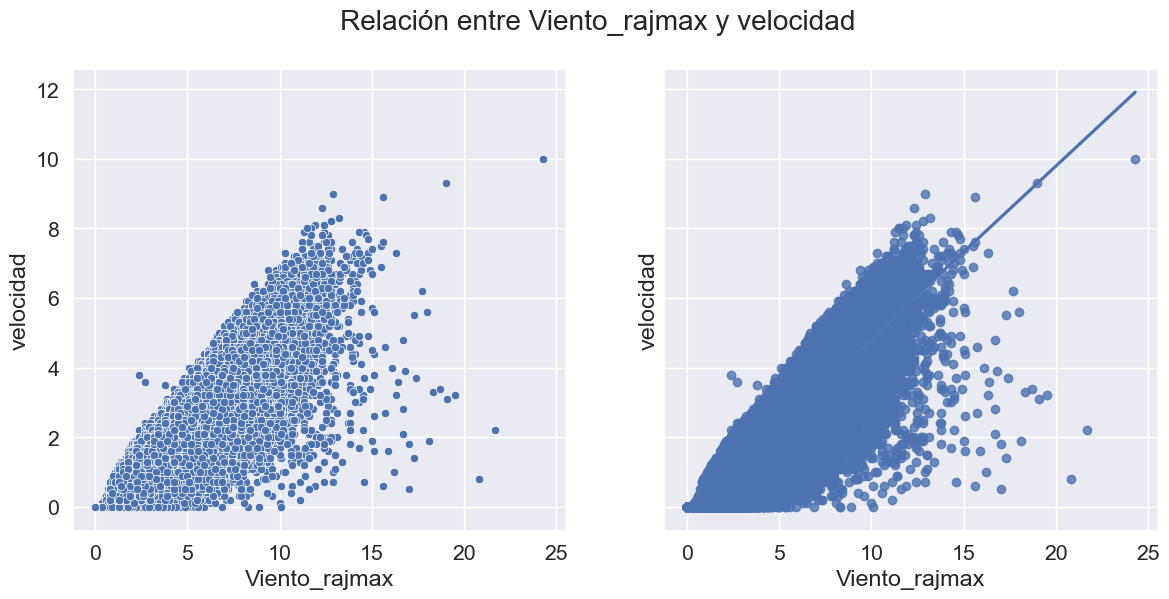

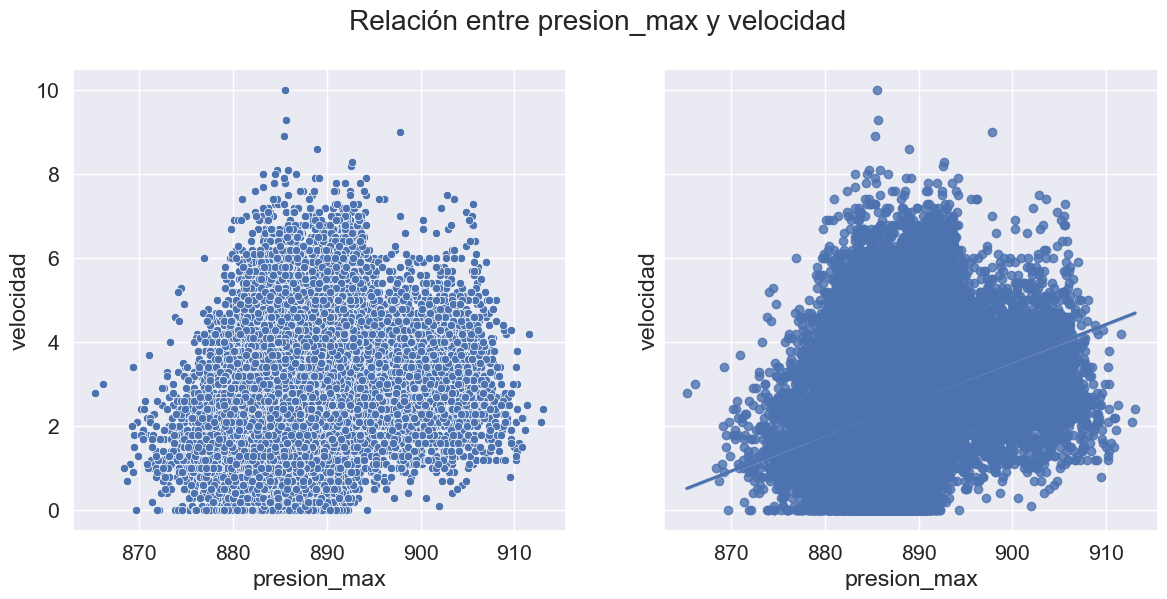

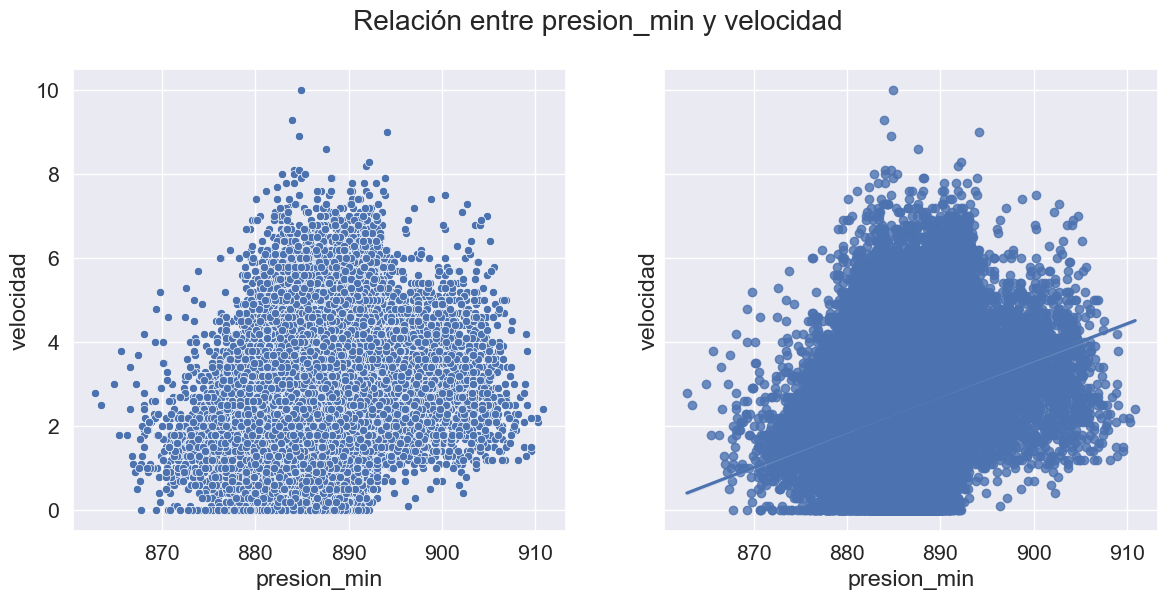

In [67]:
nume_cols.remove('velocidad')
for col in nume_cols:
    scatter_regplot(df2, col, 'velocidad')

Se realizó un trazado de scatterplot() , y regplot() con las variables explicativas numéricas. 

Velocidad del viento y presion_min muestran una relación lineal entre ellas, a medida que aumenta la presión tiende a aumentar la velocidad del viento. 
la misma tendencia se ve entre velocidad del viento y presion_max

se ve una relación lineal directa entre la variable velocidad y vientoraj_max , esto tiene sentido ya que a medida que aumenta este registro del viento, aumentarán la velocidad con la que se desplaza. Esta podría ser una variable apropiada a considerar al momento de realizar la predicción de la velocidad del viento



- Entre variables predictoras:


In [68]:
def scatter_regplot(data, strx, stry):
    sns.set(font_scale=1.4)
    fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
    sns.scatterplot(data=data, x=strx, y=stry, ax=ax[0])
    sns.regplot(data=data, x=strx, y=stry, ax=ax[1]);
    fig.suptitle('Relación entre %s y atm '%col)

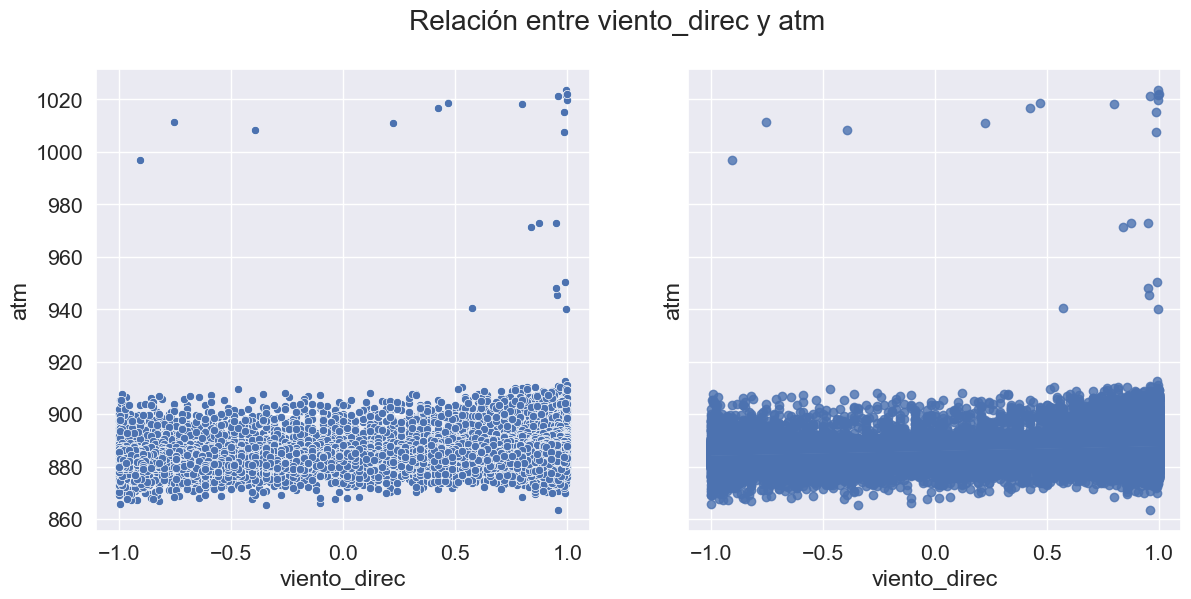

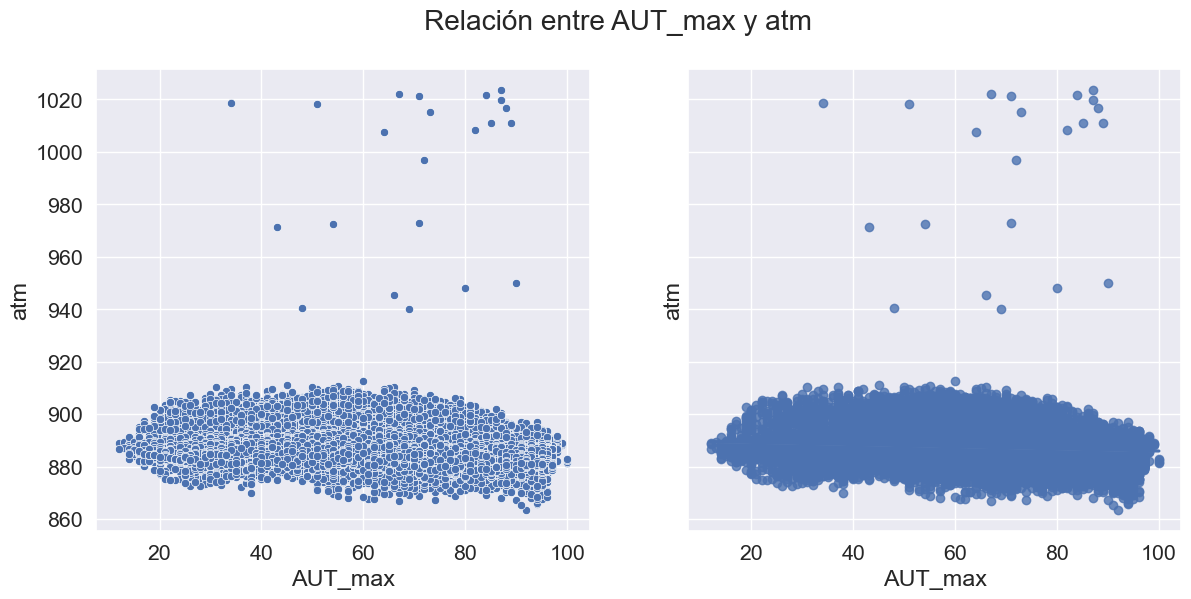

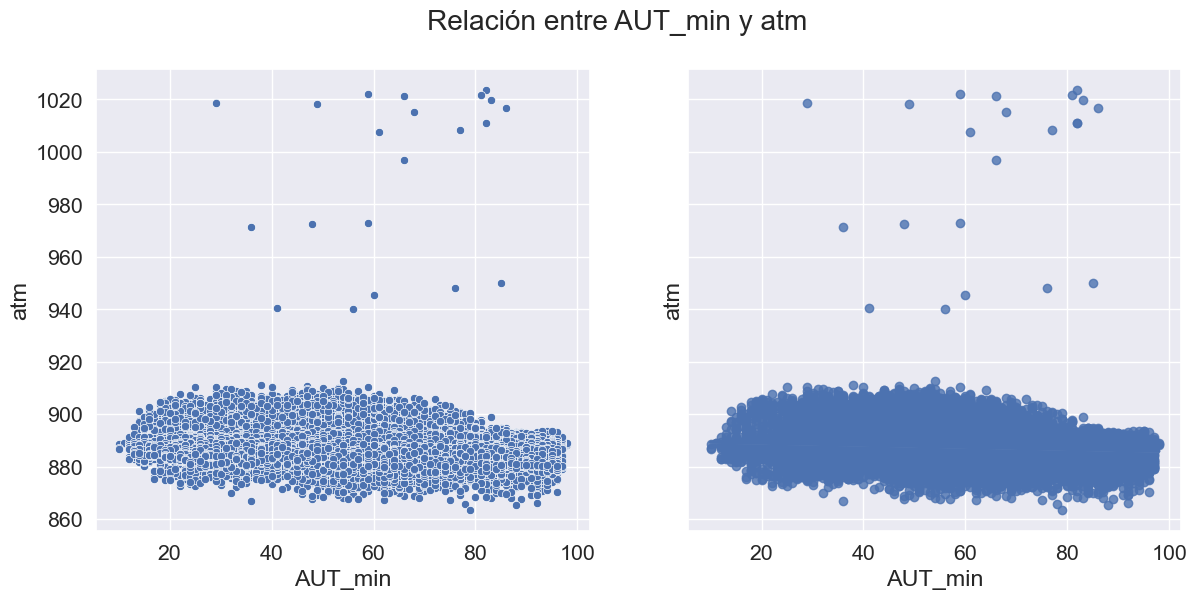

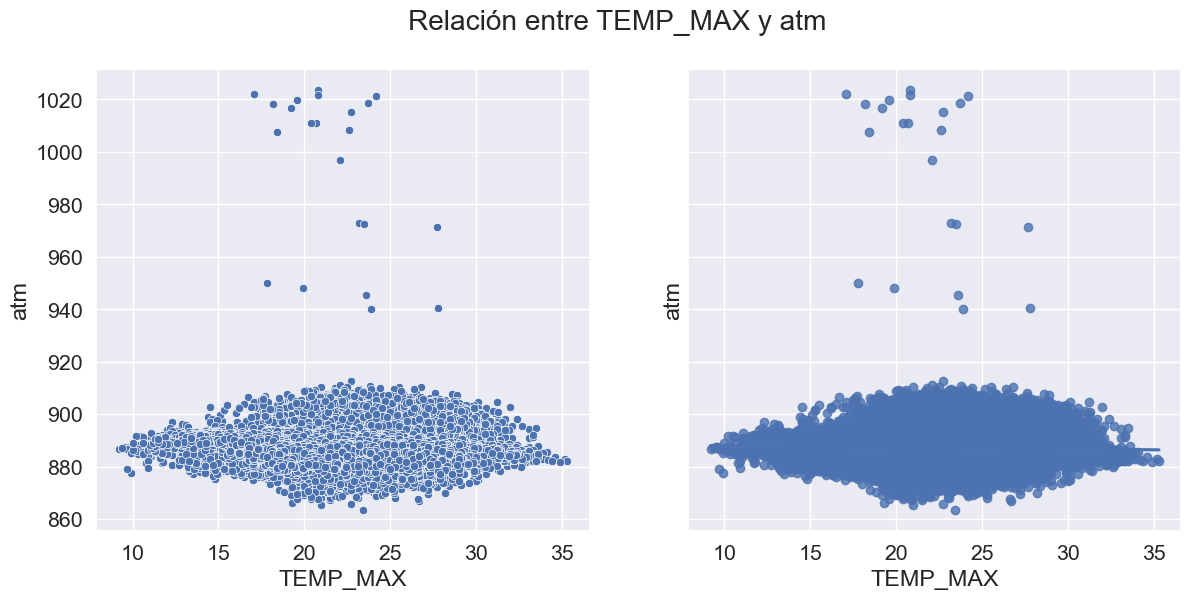

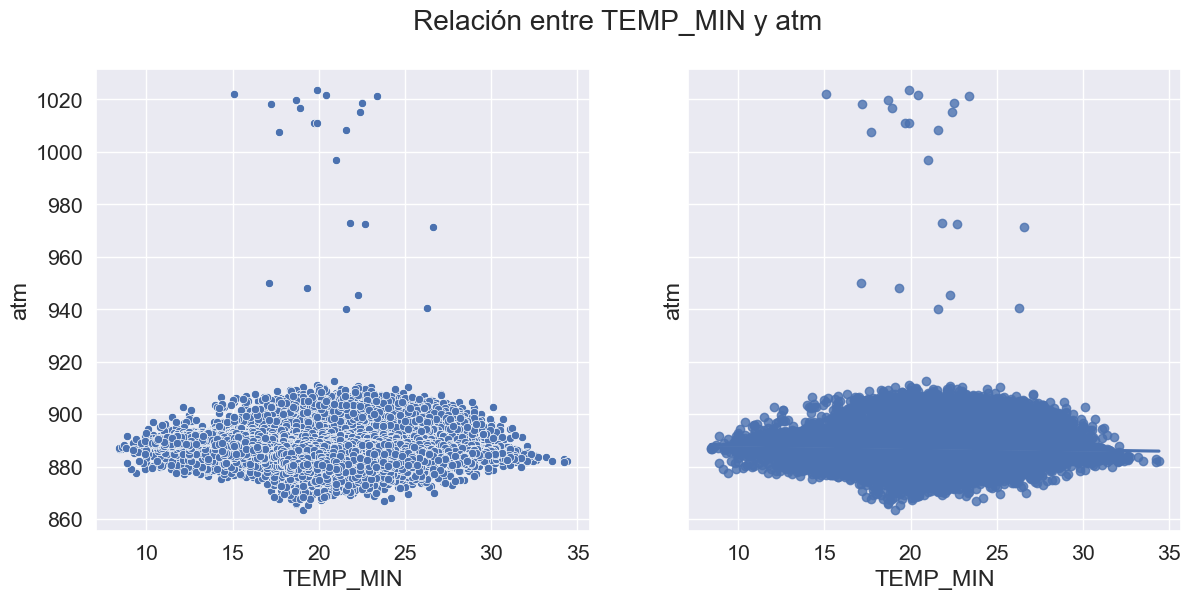

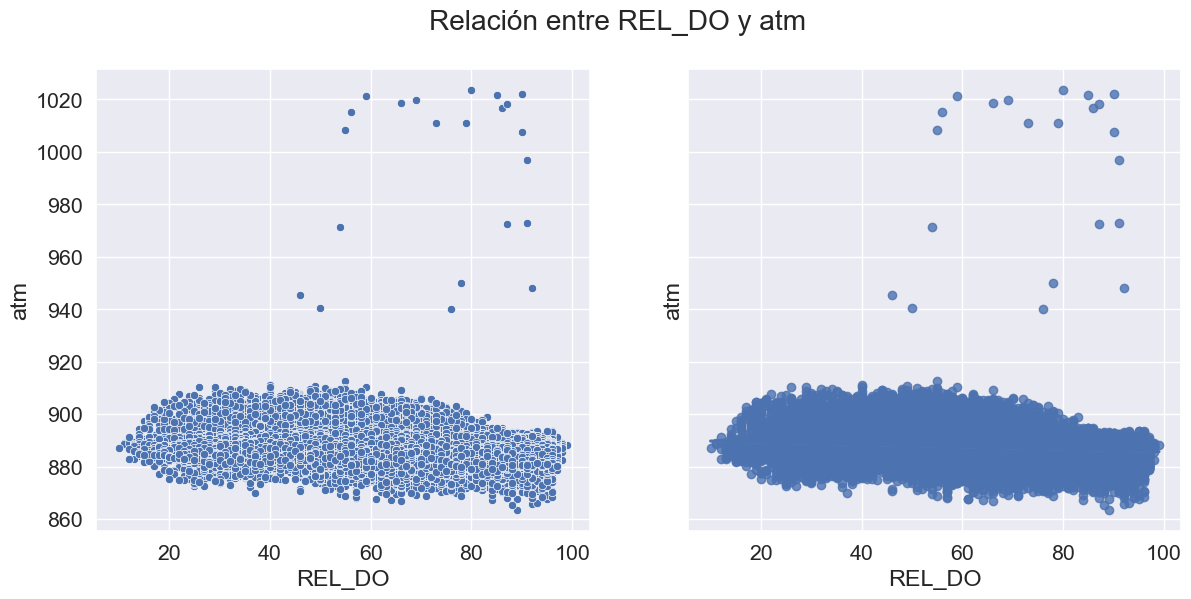

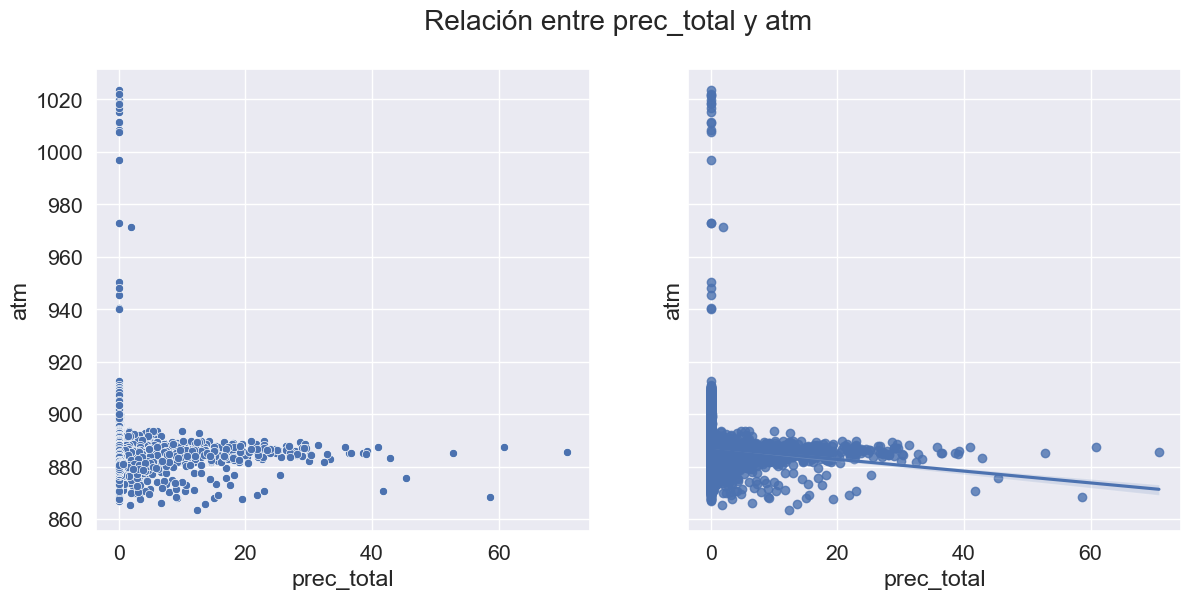

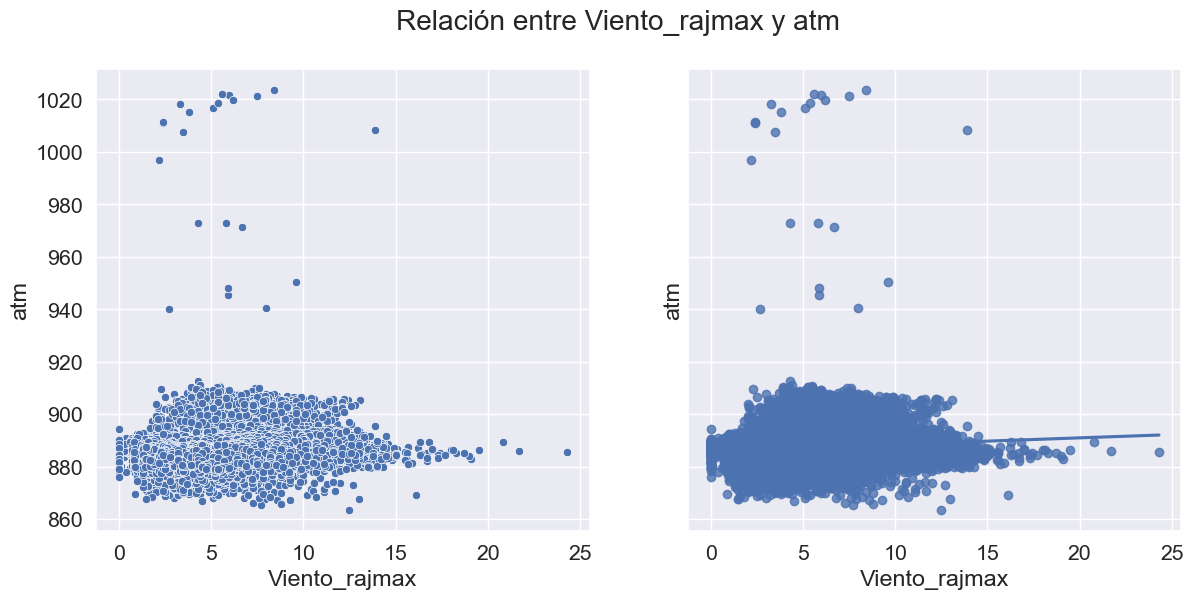

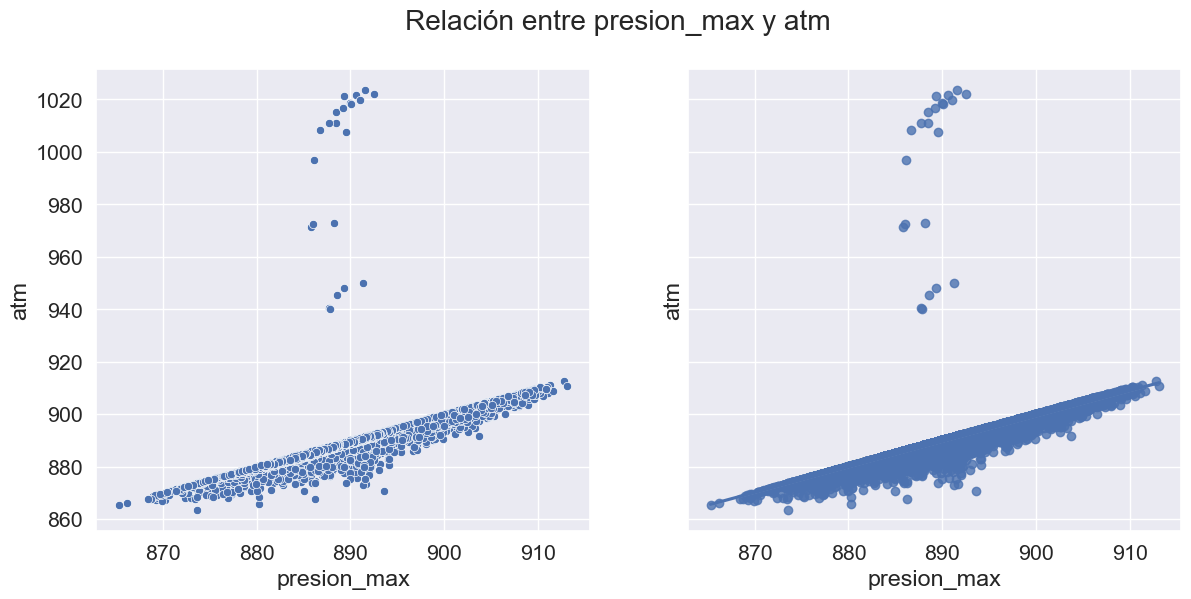

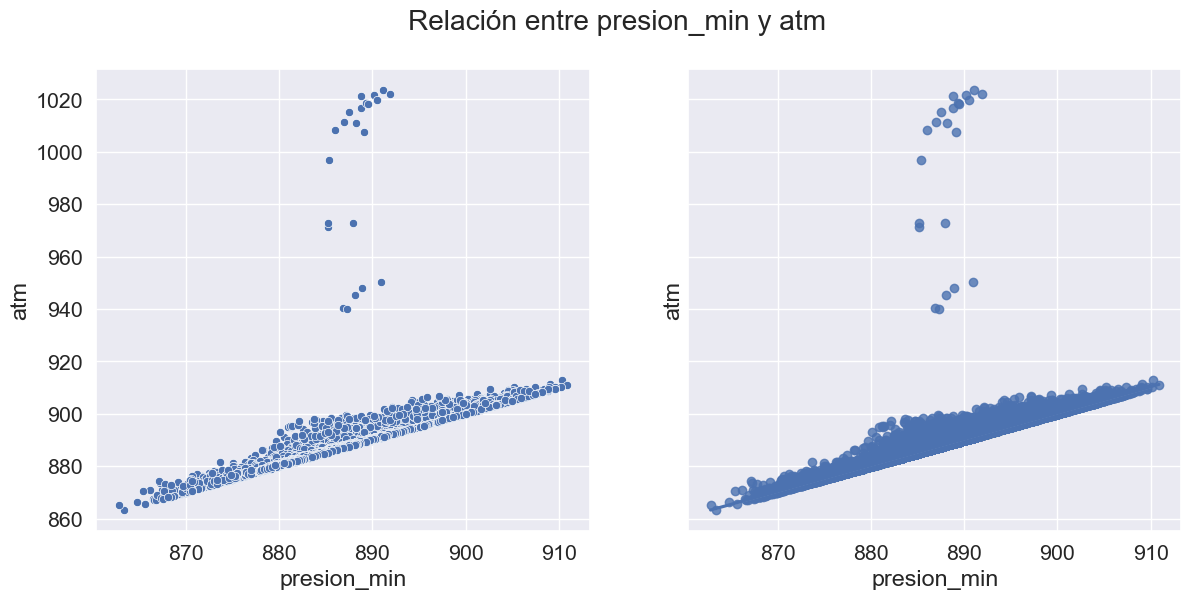

In [69]:
nume_cols.remove('atm')
for col in nume_cols:
    scatter_regplot(df2, col, 'atm')

Puede verse que a medida que se tienen mayores registros en de presion_max es porque hay una mayor presión atmosférica. 

Vemos que el registro de presion_min será mayor a medida que se encuentre en un espacio de mayor presión atmoférica, esto tiene sentido ya que si la presión atmosférica es alta las mediciones de presion_min irán aumentando.

Vemos que a mayores precipitaciones la presión atmosférica disminuye, sin embargo , es sabido que  si bien las precipitaciones pueden estar asociadas a sistemas de baja presión atmosférica, no causan directamente una disminución significativa de la presión atmosférica en una región en particular.

Se visualiza muy bien la tendencia lineal directa entre la variable presión atmoférica y los registros de presión máxima, esto tiene sentido pues a medida que aumente la presión atmosférica , los registros de presión_max aumentan

- Matriz de correlación

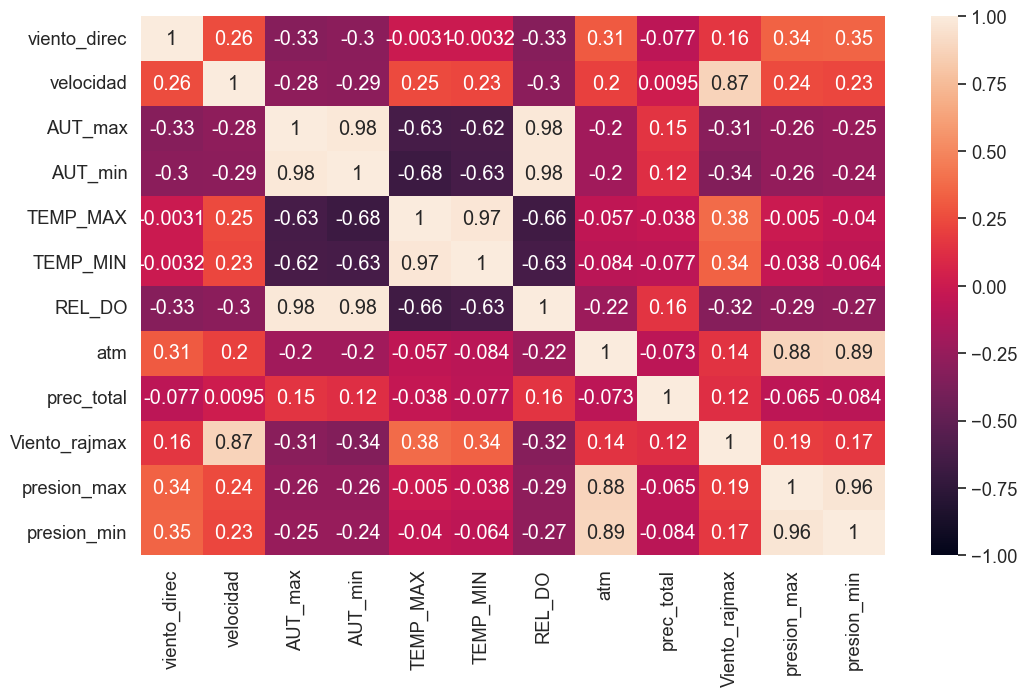

In [70]:
sns.set(font_scale=1.2)
plt.figure(figsize=(12, 7))
sns.heatmap(df2.drop(['hora'],axis=1).corr(), annot = True, vmin = -1, vmax = 1);

De la matriz de correlación anterior puede verse que hay algunas variables que se encuentran correlacionadas. 

la variable REL_DO evidencia una moderada correlación con las variables TEMP_MAX y TEM_MIN.  De la misma manera hay una moderada correlación entre las variables TEMP_MAX y TEMP_MIN con  AUT_MAX, AUT_MIN. El resto de variables no evidencian una fuerte correlación entre ellas. 

## Reducción de dimensionalidad: VIF

Realizaremos la reducción de dimensionalidad por medio de la eliminación de columnas altamente correlacionadas, usando 'Variance Inflation Factor (VIF)', un VIF mayo o igual a 5 indica alta multicolinealidad entre las correspondiente variable dependiente y las demás variables. 

In [71]:
#Las variables predictoras
df3 = df2.drop('velocidad', axis=1)
df3.head()

hora  viento_direc  AUT_max  AUT_min  TEMP_MAX  TEMP_MIN  REL_DO    atm  \
0  12:00      0.809017     69.0     60.0      22.6      20.7    61.0  888.2   
1  13:00      0.965926     62.0     55.0      24.2      22.5    55.0  888.4   
2  14:00      0.891007     56.0     50.0      25.5      24.3    51.0  888.1   
3  15:00      0.848048     52.0     44.0      27.4      25.0    44.0  887.4   
4  16:00      0.224951     50.0     43.0      27.1      25.5    46.0  886.5   

   prec_total  Viento_rajmax  presion_max  presion_min  
0         0.0            3.8        888.2        887.7  
1         0.0            4.7        888.4        888.2  
2         0.0            4.9        888.4        888.1  
3         0.0            5.8        888.1        887.4  
4         0.0            5.8        887.4        886.5

In [74]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87693 entries, 0 to 87692
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hora           87693 non-null  object 
 1   viento_direc   87693 non-null  float64
 2   AUT_max        87693 non-null  float64
 3   AUT_min        87693 non-null  float64
 4   TEMP_MAX       87693 non-null  float64
 5   TEMP_MIN       87693 non-null  float64
 6   REL_DO         87693 non-null  float64
 7   atm            87693 non-null  float64
 8   prec_total     87693 non-null  float64
 9   Viento_rajmax  87693 non-null  float64
 10  presion_max    87693 non-null  float64
 11  presion_min    87693 non-null  float64
dtypes: float64(11), object(1)
memory usage: 8.0+ MB


Se decidió excluir la variable hora, ya que al incluirla , la técnica VIF excluía la variable "Ráfaga de viento máxima", la cual se considera importante para predecir la velocidad del viento, esta última variable fue la que mostró mejor asociación lineal con la variable respuesta, por tanto, se ha decido dar prioridad a esta variable.

In [77]:
# Calcula el VIF para cada variable predictora
def reduccion_VIF(X):
    vif_dt=pd.DataFrame()
    vif_dt['variable']=X.columns
    vif_dt["VIF"]=[variance_inflation_factor(X.values,i) for i in range (len(X.columns))]
    return vif_dt

In [78]:
reduccion_VIF(df3.drop('hora', axis=1))

variable            VIF
0    viento_direc       1.714903
1         AUT_max    1035.490461
2         AUT_min     868.669868
3        TEMP_MAX    2431.219027
4        TEMP_MIN    2035.022178
5          REL_DO     593.271593
6             atm  239633.065205
7      prec_total       1.137503
8   Viento_rajmax       7.476801
9     presion_max  944178.864436
10    presion_min  965371.723991

In [79]:
def seleccion_predictoras(xdf,VIFMAX=5):
    X = xdf.copy(deep = True)
    VIF=reduccion_VIF(X)
    while VIF['VIF'].max()>VIFMAX:
        indice_maximo = VIF['VIF'].idxmax()
        columna_max =VIF.at[indice_maximo, 'variable']
        X.drop(columns=[columna_max], inplace=True)
        VIF=reduccion_VIF(X)   
    print("Variables predictoras seleccionadas: ")
    return X
    

In [80]:
seleccion_predictoras(df3.drop('hora', axis=1),VIFMAX=5)

Variables predictoras seleccionadas: 


viento_direc  AUT_min  prec_total  Viento_rajmax
0          0.809017     60.0         0.0            3.8
1          0.965926     55.0         0.0            4.7
2          0.891007     50.0         0.0            4.9
3          0.848048     44.0         0.0            5.8
4          0.224951     43.0         0.0            5.8
...             ...      ...         ...            ...
87688     -0.615661     78.0         0.0           12.3
87689     -0.469472     79.0         0.0            9.9
87690     -0.484810     82.0         0.0            8.9
87691     -0.484810     85.0         0.0            8.0
87692     -0.573576     88.0         0.6            7.5

[87693 rows x 4 columns]

Las variables predictoras resultantes son:

- Dirección del viento--> 'viento_direc'
- Humedad rel. mín. hora anterior----> AUT_min
- Precipitación total por hora ----> prec_total
- ráfaga de viento máxima-----> Viento_rajmax

# VELOCIDAD DEL VIENTO: MODELOS

## Entrenamiento y validación

In [81]:
base_datos=df2[['velocidad','Viento_rajmax', 'prec_total', 'viento_direc', 'AUT_min']]
base_datos

velocidad  Viento_rajmax  prec_total  viento_direc  AUT_min
0            1.8            3.8         0.0      0.809017     60.0
1            2.7            4.7         0.0      0.965926     55.0
2            2.0            4.9         0.0      0.891007     50.0
3            2.5            5.8         0.0      0.848048     44.0
4            2.4            5.8         0.0      0.224951     43.0
...          ...            ...         ...           ...      ...
87688        5.6           12.3         0.0     -0.615661     78.0
87689        4.9            9.9         0.0     -0.469472     79.0
87690        4.5            8.9         0.0     -0.484810     82.0
87691        3.2            8.0         0.0     -0.484810     85.0
87692        2.3            7.5         0.6     -0.573576     88.0

[87693 rows x 5 columns]

In [82]:
base_datos.index = np.arange(1, len(base_datos) + 1)
base_datos

velocidad  Viento_rajmax  prec_total  viento_direc  AUT_min
1            1.8            3.8         0.0      0.809017     60.0
2            2.7            4.7         0.0      0.965926     55.0
3            2.0            4.9         0.0      0.891007     50.0
4            2.5            5.8         0.0      0.848048     44.0
5            2.4            5.8         0.0      0.224951     43.0
...          ...            ...         ...           ...      ...
87689        5.6           12.3         0.0     -0.615661     78.0
87690        4.9            9.9         0.0     -0.469472     79.0
87691        4.5            8.9         0.0     -0.484810     82.0
87692        3.2            8.0         0.0     -0.484810     85.0
87693        2.3            7.5         0.6     -0.573576     88.0

[87693 rows x 5 columns]

Tenemos 87693 observaciones, formaremos los respectivos conjuntos de entrenamiento, validación y testeo:

In [101]:
# variables predictoras:
XX=base_datos.drop('velocidad', axis=1)
XX.head()

Viento_rajmax  prec_total  viento_direc  AUT_min
1            3.8         0.0      0.809017     60.0
2            4.7         0.0      0.965926     55.0
3            4.9         0.0      0.891007     50.0
4            5.8         0.0      0.848048     44.0
5            5.8         0.0      0.224951     43.0

In [102]:
y=base_datos.drop(['prec_total', 'viento_direc', 'AUT_min', 'Viento_rajmax'], axis=1)
y.head()

velocidad
1        1.8
2        2.7
3        2.0
4        2.5
5        2.4

Realizamos la partición de los datos para X_train , X_test, Y_train, Y_test

In [129]:
tamaño=24
x_train=[]
x_test=[]
y_train=[]
y_test=[]

for i in range(0, 1200, tamaño):
    xtrain = XX[:i+tamaño]
    ytrain = y[:i+tamaño]
    
    # Añadir a x_train y y_train
    x_train.append(xtrain)
    y_train.append(ytrain)
    
    xtest = XX[i + tamaño:i + 2 * tamaño]
    ytest = y[i + tamaño:i + 2 * tamaño]
    x_test.append(xtest)
    y_test.append(ytest)
   

In [130]:
len(x_train[-1])

1200

### K-NN (Regresión):

Para medir la eficacia de este modelo se usará la métrica $R^2$, RMSE y MAPE

In [131]:
params={'n_neighbors':[6,8,10,12,14,16,18,20]}

In [132]:

def grid_searchKNN(params):
    best_k = None
    best_rmse =float('inf')
    for k in params['n_neighbors']:
        rmse=[]
        knn = KNeighborsRegressor(n_neighbors=k)
        for ix in range (len(x_train)):
            knn.fit(x_train[ix], y_train[ix])
            y_pred = knn.predict(x_test[ix])
            error=np.sqrt(mean_squared_error(y_test[ix],y_pred))
            rmse.append(error)
        avg_rmse=(np.mean(rmse))
        if avg_rmse < best_rmse:
            best_rmse=avg_rmse
            best_k=k
    return best_k, best_rmse


In [133]:
grid_searchKNN(params)

(6, 0.6372764815456139)

### Regresión Ridge:

In [134]:
params_alpha={'alpha':[0.001, 0.01, 0.1, 1, 5, 10]}

In [135]:
def grid_search_Ridge(params_alpha):
    best_alpha = None
    best_rmse =float('inf')
    for p in params_alpha['alpha']:
        rmse=[]
        ridge=Ridge(alpha=p)
        for ix in range (len(x_train)):
            ridge.fit(x_train[ix], y_train[ix])
            y_pred = ridge.predict(x_test[ix])
            error=np.sqrt(mean_squared_error(y_test[ix],y_pred))
            rmse.append(error)
        avg_rmse=(np.mean(rmse))
        if avg_rmse < best_rmse:
            best_rmse=avg_rmse
            best_alpha=p
    return best_alpha, best_rmse

In [136]:
grid_search_Ridge(params_alpha)

(5, 0.5258638490552863)

### Regresión Lasso:

In [138]:
params_alfa={'alpha':[0.001, 0.01, 0.1, 1, 5, 10]}

In [139]:
def grid_search_Lasso(params_alfa):
    best_alpha = None
    best_rmse =float('inf')
    for p in params_alfa['alpha']:
        rmse=[]
        lasso=Lasso(alpha=p, max_iter=100000)
        for ix in range (len(x_train)):
            lasso.fit(x_train[ix], y_train[ix])
            y_pred = lasso.predict(x_test[ix])
            error=np.sqrt(mean_squared_error(y_test[ix],y_pred))
            rmse.append(error)
        avg_rmse=(np.mean(rmse))
        if avg_rmse < best_rmse:
            best_rmse=avg_rmse
            best_alpha=p
    return best_alpha, best_rmse

In [140]:
grid_search_Lasso(params_alfa)

(0.001, 0.5262308262673426)

### MLP ( Regresión)

Debido al costo computacional que lleva entrenar este modelo con todas las combinaciones propuestas, se usarán menos particiones del conjunto de entrenamiento y prueba. 

In [141]:
from sklearn.model_selection import ParameterGrid

In [142]:
parameters = {
    'hiddenn_layer': [[100,50], [100,100]],  
    'solver': ['adam'],
    'alpha': [0.0001, 0.01, 0.1, 1, 10]
}

In [143]:
param_grid=list(ParameterGrid(parameters))
param_grid

[{'alpha': 0.0001, 'hiddenn_layer': [100, 50], 'solver': 'adam'},
 {'alpha': 0.0001, 'hiddenn_layer': [100, 100], 'solver': 'adam'},
 {'alpha': 0.01, 'hiddenn_layer': [100, 50], 'solver': 'adam'},
 {'alpha': 0.01, 'hiddenn_layer': [100, 100], 'solver': 'adam'},
 {'alpha': 0.1, 'hiddenn_layer': [100, 50], 'solver': 'adam'},
 {'alpha': 0.1, 'hiddenn_layer': [100, 100], 'solver': 'adam'},
 {'alpha': 1, 'hiddenn_layer': [100, 50], 'solver': 'adam'},
 {'alpha': 1, 'hiddenn_layer': [100, 100], 'solver': 'adam'},
 {'alpha': 10, 'hiddenn_layer': [100, 50], 'solver': 'adam'},
 {'alpha': 10, 'hiddenn_layer': [100, 100], 'solver': 'adam'}]

In [144]:
param_list=[]
mae=[]
scaler = StandardScaler()
def grid_search_MLP(param_grid):
    best_params = None
    best_rmse =float('inf')

    for params in param_grid:
        param_list.append(params)
        mlp_regressor = MLPRegressor(hidden_layer_sizes=params['hiddenn_layer'], activation='relu', solver=params['solver'], 
                             alpha=params['alpha'], batch_size='auto', learning_rate='constant', max_iter=1000, random_state=42)
        rmse=[]
        for ix in range (len(x_train)):
            x_train[ix] = scaler.fit_transform(x_train[ix])
            x_test[ix]= scaler.fit_transform(x_test[ix])
            y_train[ix]=scaler.fit_transform(y_train[ix])
            y_test[ix]=scaler.fit_transform(y_test[ix])
            mlp_regressor.fit(x_train[ix], y_train[ix])
            y_pred=mlp_regressor.predict(x_test[ix])
            error=np.sqrt(mean_squared_error(y_test[ix],y_pred))
            rmse.append(error)
        avg_rmse=(np.mean(rmse))
        mae.append(avg_rmse)
        if avg_rmse < best_rmse:
            best_rmse=avg_rmse
            best_params=params
    return best_params, best_rmse

In [145]:
grid_search_MLP(param_grid)

({'alpha': 1, 'hiddenn_layer': [100, 100], 'solver': 'adam'},
 0.5284708848903205)

In [146]:
# Combinar las listas losses y params_list utilizando zip()
losses_with_params =list(zip(mae, param_list))
# Imprimir los valores de pérdida junto con sus respectivos hiperparámetros
for loss, params in losses_with_params:
    print('Loss:', loss)
    print('Hyperparameters:', params)
    print()

Loss: 0.5729352277632793
Hyperparameters: {'alpha': 0.0001, 'hiddenn_layer': [100, 50], 'solver': 'adam'}

Loss: 0.5789118557807476
Hyperparameters: {'alpha': 0.0001, 'hiddenn_layer': [100, 100], 'solver': 'adam'}

Loss: 0.5737890676055095
Hyperparameters: {'alpha': 0.01, 'hiddenn_layer': [100, 50], 'solver': 'adam'}

Loss: 0.578615795494546
Hyperparameters: {'alpha': 0.01, 'hiddenn_layer': [100, 100], 'solver': 'adam'}

Loss: 0.5655352331086658
Hyperparameters: {'alpha': 0.1, 'hiddenn_layer': [100, 50], 'solver': 'adam'}

Loss: 0.5715361531533094
Hyperparameters: {'alpha': 0.1, 'hiddenn_layer': [100, 100], 'solver': 'adam'}

Loss: 0.5297111061975409
Hyperparameters: {'alpha': 1, 'hiddenn_layer': [100, 50], 'solver': 'adam'}

Loss: 0.5284708848903205
Hyperparameters: {'alpha': 1, 'hiddenn_layer': [100, 100], 'solver': 'adam'}

Loss: 0.5595681934864761
Hyperparameters: {'alpha': 10, 'hiddenn_layer': [100, 50], 'solver': 'adam'}

Loss: 0.5585296989701063
Hyperparameters: {'alpha': 10, 'h

### SVM:

In [149]:
parametros = {
    'gamma': [0.001, 0.01, 0.1, 1, 10],  
    'C':  [0.001, 0.01, 0.1, 1, 10],
}

In [150]:
param_grid_SVM=list(ParameterGrid(parametros))
param_grid_SVM

[{'C': 0.001, 'gamma': 0.001},
 {'C': 0.001, 'gamma': 0.01},
 {'C': 0.001, 'gamma': 0.1},
 {'C': 0.001, 'gamma': 1},
 {'C': 0.001, 'gamma': 10},
 {'C': 0.01, 'gamma': 0.001},
 {'C': 0.01, 'gamma': 0.01},
 {'C': 0.01, 'gamma': 0.1},
 {'C': 0.01, 'gamma': 1},
 {'C': 0.01, 'gamma': 10},
 {'C': 0.1, 'gamma': 0.001},
 {'C': 0.1, 'gamma': 0.01},
 {'C': 0.1, 'gamma': 0.1},
 {'C': 0.1, 'gamma': 1},
 {'C': 0.1, 'gamma': 10},
 {'C': 1, 'gamma': 0.001},
 {'C': 1, 'gamma': 0.01},
 {'C': 1, 'gamma': 0.1},
 {'C': 1, 'gamma': 1},
 {'C': 1, 'gamma': 10},
 {'C': 10, 'gamma': 0.001},
 {'C': 10, 'gamma': 0.01},
 {'C': 10, 'gamma': 0.1},
 {'C': 10, 'gamma': 1},
 {'C': 10, 'gamma': 10}]

In [161]:
def gridsearch_SVM(param_grid_SVM):
    best_params = None
    best_rmse =float('inf')
    for params in param_grid_SVM:
        svr = SVR(gamma=params['gamma'], C=params['C'])
        rmse=[]
        for ix in range (len(x_train)):
            x_train[ix] = scaler.fit_transform(x_train[ix])
            x_test[ix]= scaler.fit_transform(x_test[ix])
            y_train[ix]=scaler.fit_transform(y_train[ix])
            y_test[ix]=scaler.fit_transform(y_test[ix])
            svr.fit(x_train[ix], y_train[ix])
            y_pred=svr.predict(x_test[ix])
            error=np.sqrt(mean_squared_error(y_test[ix],y_pred))
            rmse.append(error)
        avg_rmse=(np.mean(rmse))
        if avg_rmse < best_rmse:
            best_rmse=avg_rmse
            best_params=params
    return best_params, best_rmse

In [162]:
gridsearch_SVM(param_grid_SVM)

({'C': 10, 'gamma': 0.01}, 0.5220041712622059)

### XGBoosting:

In [163]:
parametros_XG =  {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
}

In [164]:
parametros_XGb=list(ParameterGrid(parametros_XG))
parametros_XGb

[{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100},
 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200},
 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300},
 {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100},
 {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200},
 {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300},
 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100},
 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200},
 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300},
 {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100},
 {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200},
 {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300},
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100},
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200},
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300},
 {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100},
 

In [166]:
def xgboost(parametros_XGb):
    best_params = None
    best_rmse =float('inf')
    for params in parametros_XGb:
        XGBs = xgb.XGBRegressor(objective="reg:squarederror", **params)
        rmse=[]
        for ix in range (len(x_train)):
            XGBs.fit(x_train[ix], y_train[ix])
            y_pred=XGBs.predict(x_test[ix])
            error=np.sqrt(mean_squared_error(y_test[ix],y_pred))
            rmse.append(error)
        avg_rmse=(np.mean(rmse))
        if avg_rmse < best_rmse:
            best_rmse=avg_rmse
            best_params=params
    return best_params, best_rmse

In [167]:
xgboost(parametros_XGb)

({'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100},
 0.5520529587045568)

### Comparación entre mejores modelos:

In [168]:
# variables predictoras:
XX.head()

Viento_rajmax  prec_total  viento_direc  AUT_min
1            3.8         0.0      0.809017     60.0
2            4.7         0.0      0.965926     55.0
3            4.9         0.0      0.891007     50.0
4            5.8         0.0      0.848048     44.0
5            5.8         0.0      0.224951     43.0

In [ ]:
# Variable dependiente:
y.head()

Partimos nuevamente la base de datos y formamos un set de entrenamiento y uno de testeo. El set de entrenamiento se usará con cada uno de los mejores modelos obtenidos, una vez entrenados se hará la rpedicción de las últimas 24 observaciones y se calculará el $R^2$

In [173]:
XTRAIN = XX.iloc[:87669]
XTRAIN.head()

Viento_rajmax  prec_total  viento_direc  AUT_min
1            3.8         0.0      0.809017     60.0
2            4.7         0.0      0.965926     55.0
3            4.9         0.0      0.891007     50.0
4            5.8         0.0      0.848048     44.0
5            5.8         0.0      0.224951     43.0

In [175]:
YTRAIN = y.iloc[:87669]
YTRAIN.head()

velocidad
1        1.8
2        2.7
3        2.0
4        2.5
5        2.4

In [178]:
XTEST=XX.iloc[-24:]
XTEST.head()

Viento_rajmax  prec_total  viento_direc  AUT_min
87670            3.5         0.0     -0.224951     91.0
87671            3.4         0.0     -0.515038     91.0
87672            3.9         0.0     -0.406737     92.0
87673            4.5         0.0     -0.275637     93.0
87674            4.5         0.0     -0.052336     94.0

In [179]:
len(XTEST)

24

In [180]:
YTEST=y.iloc[-24:]
YTEST.head()

velocidad
87670        1.8
87671        2.1
87672        1.9
87673        2.6
87674        2.6

#### Cálculo del $R^2$:

- KNN (Regresión):

In [181]:
knn1 = KNeighborsRegressor(n_neighbors=6)
knn1.fit(XTRAIN, YTRAIN)
y_pred = knn1.predict(XTEST)
r2_knn1 = r2_score(YTEST, y_pred)
print(r2_knn1)

0.8693973960133655


- Regresión Ridge:

In [182]:
ridge1=Ridge(alpha=5)
ridge1.fit(XTRAIN, YTRAIN)
y_pred_ridge = ridge1.predict(XTEST)
r2_ridge = r2_score(YTEST, y_pred_ridge)
print(r2_ridge)

0.8550641628875353


- Regresión Lasso:

In [183]:
lasso1=Lasso(alpha=0.001, max_iter=100000)
lasso1.fit(XTRAIN, YTRAIN)
y_pred_lasso = lasso1.predict(XTEST)
r2_lasso = r2_score(YTEST, y_pred_lasso)
print(r2_lasso)

0.8551393359092903


- MLP:

In [185]:
mlp_regressor1 = MLPRegressor(hidden_layer_sizes=[100,100], activation='relu', solver='adam', 
                             alpha=1, batch_size='auto', learning_rate='constant', max_iter=1000, random_state=42)

In [186]:
XT = scaler.fit_transform(XTRAIN)
X_test1= scaler.fit_transform(XTEST)
ytest1=scaler.fit_transform(YTEST)
YT=scaler.fit_transform(YTRAIN)
mlp_regressor1.fit(XT, YT)
y_pred_mlp=mlp_regressor1.predict(X_test1)
r2_MLP = r2_score(ytest1, y_pred_mlp)
print(r2_MLP)

0.8668644875014058


In [187]:
svr1 = SVR(gamma=10, C=0.01)
svr1.fit(XT, YT)
y_pred_svr=svr1.predict(X_test1)
r2_svr = r2_score(ytest1, y_pred_svr)
print(r2_svr)

0.31217359211731477


In [188]:
XGBs1 = xgb.XGBRegressor(objective="reg:squarederror",n_estimators=100,max_depth=3,learning_rate=0.1,)
XGBs1.fit(XTRAIN, YTRAIN)
y_pred_XG = XGBs1.predict(XTEST)
r2_XG = r2_score(YTEST, y_pred_XG)
print(r2_XG)

0.7786498407921217


## Resultados:

| Modelo   | $R^2$    | RMSE    |
|----------|--------- |---------|
| K-NN     | 0.869    | 0.6372  |
| Ridge    | 0.855    | 0.525   |
| Lasso    | 0.855    | 0.526   |
| XGBoost  | 0.778    | 0.552   |
| SVM      | 0.312    | 0.522   |
| MLP      | 0.866    | 0.528   |


# CONCLUSIONES:

- Se abordó con éxito la tarea de predecir la velocidad del viento utilizando un conjunto reducido de variables explicativas. 

- Proceso de Limpieza y Exploración de Datos: Se llevó a cabo un proceso de limpieza y exploración exhaustiva de los datos antes de construir los modelos de predicción. Esto incluyó la identificación y manejo de valores atípicos, así como la detección de multicolinealidad utilizando el VIF.

- Se evaluaron varios algoritmos de aprendizaje automático, incluyendo K-Vecinos Cercanos (KNN), Redes Neuronales Artificiales (MLP), Ridge, Lasso, Support Vector Machines (SVM), XGBoost y SVM de regresión. Se buscó determinar cuál de estos modelos ofrecía el mejor rendimiento en la predicción de la velocidad del viento. Para evaluar el rendimiento de los modelos, se utilizaron métricas comunes como el coeficiente de determinación (R^2) y la raíz del error cuadrático medio (RMSE). Estas métricas proporcionaron una medida cuantitativa de la capacidad de los modelos para realizar predicciones precisas.

- El hecho de que el modelo de Red Neuronal Artificial (Multilayer Perceptron - MLP) haya tenido un valor bajo de RMSE (Root Mean Squared Error) y al mismo tiempo un valor alto de $R^2$ (coeficiente de determinación) es un resultado muy positivo. Estos resultados sugieren que el modelo MLP fue capaz de realizar predicciones precisas de la velocidad del viento y explicar una gran proporción de la variabilidad en los datos. 

- De todos los modelos, SVM tuvo el menor rendimiento, explicando solo un 31,2% de la variabilidad de los datos. 

- La métrica MAPE se excluyó ya que en muchas ocasiones no podía ser calculada, esto debido a la presencia de ceros la variable dependiente.

- Hay que tener en cuenta que debido a los costos computacionales y el gran tamaño de la base de datos fue necesario tomar una parte de los datos de entrenamiento y validación, ya que al considerar todas las particiones de la data , los modelos tardaban demasiado en correr, algunos incluso nunca finalizaron. se consideraron 50 particiones de los datos de entrenamiento  y validación , donde las predicciónes eran de 24 observaciones siguientes mientras que x_train aumentaba 24 unidades en cada partición.  Con estos conjuntos de entrenamiento y prueba fue posible obtener resultados alentadores.